In [9]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.2 MB 2.4 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/10.2 MB 2.0 MB/s eta 0:00:05
   ------ --------------------------------- 1.6/10.2 MB 2.6 MB/s eta 0:00:04
   --------- ------------------------------ 2.4/10.2 MB 2.9 MB/s eta 0:00:03
   ------------ --------------------------- 3.1/10.2 MB 3.0 MB/s eta 0:00:03
   ------------- -------------------------- 3.4/10.2 MB 3.1 MB/s eta 0:00:03
   ----------------- ---------------------- 4.5/10.2 MB 2.9 MB/s eta 0:00:02
   ------------------- -------------------- 5.0/10.2 MB 3.1 MB/s eta 0:00:02
   --------------------- ------------------ 5.5/10.2 MB 2.9 MB/s eta 0:00:02
   ----------------------- ---------------- 6.0/10.2 MB 3.0 MB/s eta 0:00:02
   ---------------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.18.0 requires torch==2.3.0, but you have torch 2.4.0 which is incompatible.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [28]:
# Load the dataset
df = pd.read_excel('main-dataset.xlsx')

# Drop 'Filename' and 'Syntax Errors' columns
df = df.drop(['Filename', 'Syntax Errors'], axis=1)

# Separate features and target
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the best model based on grid search results
best_model = MLPClassifier(
    hidden_layer_sizes=(30,),
    activation='tanh',
    alpha=0.0001,
    learning_rate='constant',
    max_iter=1000,
    random_state=42
)

# Train the model
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_test, y_pred))

# Optional: Save the model
joblib.dump(best_model, 'best_model.joblib')
print("Model saved as 'best_model.joblib'")

Accuracy: 0.8805
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       551
           1       0.88      0.87      0.88       512

    accuracy                           0.88      1063
   macro avg       0.88      0.88      0.88      1063
weighted avg       0.88      0.88      0.88      1063

Model saved as 'best_model.joblib'


In [11]:
# Load the dataset
df = pd.read_excel('main-dataset.xlsx')

# Drop 'Filename' and 'Syntax Errors' columns
df = df.drop(['Filename', 'Syntax Errors'], axis=1)

# Separate features and target
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Define the best model based on grid search results
best_model = MLPClassifier(
    hidden_layer_sizes=(30,),
    activation='tanh',
    alpha=0.0001,
    learning_rate='constant',
    max_iter=1000,
    random_state=42
)

# Train the model
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_test, y_pred))

# Optional: Save the model
import joblib
joblib.dump(best_model, 'best_model.joblib')
print("Model saved as 'best_model.joblib'")

Accuracy: 0.8805
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       551
           1       0.88      0.87      0.88       512

    accuracy                           0.88      1063
   macro avg       0.88      0.88      0.88      1063
weighted avg       0.88      0.88      0.88      1063

Model saved as 'best_model.joblib'


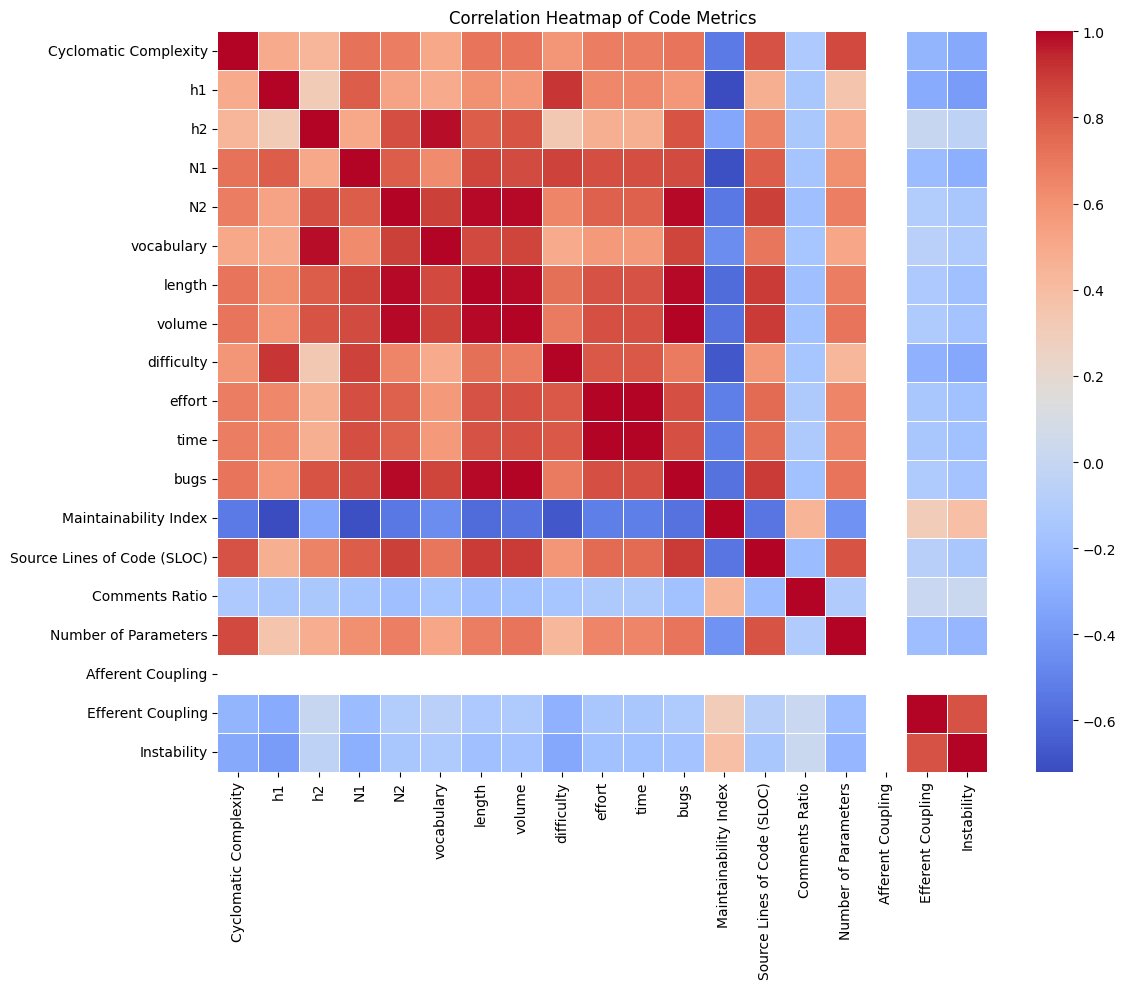

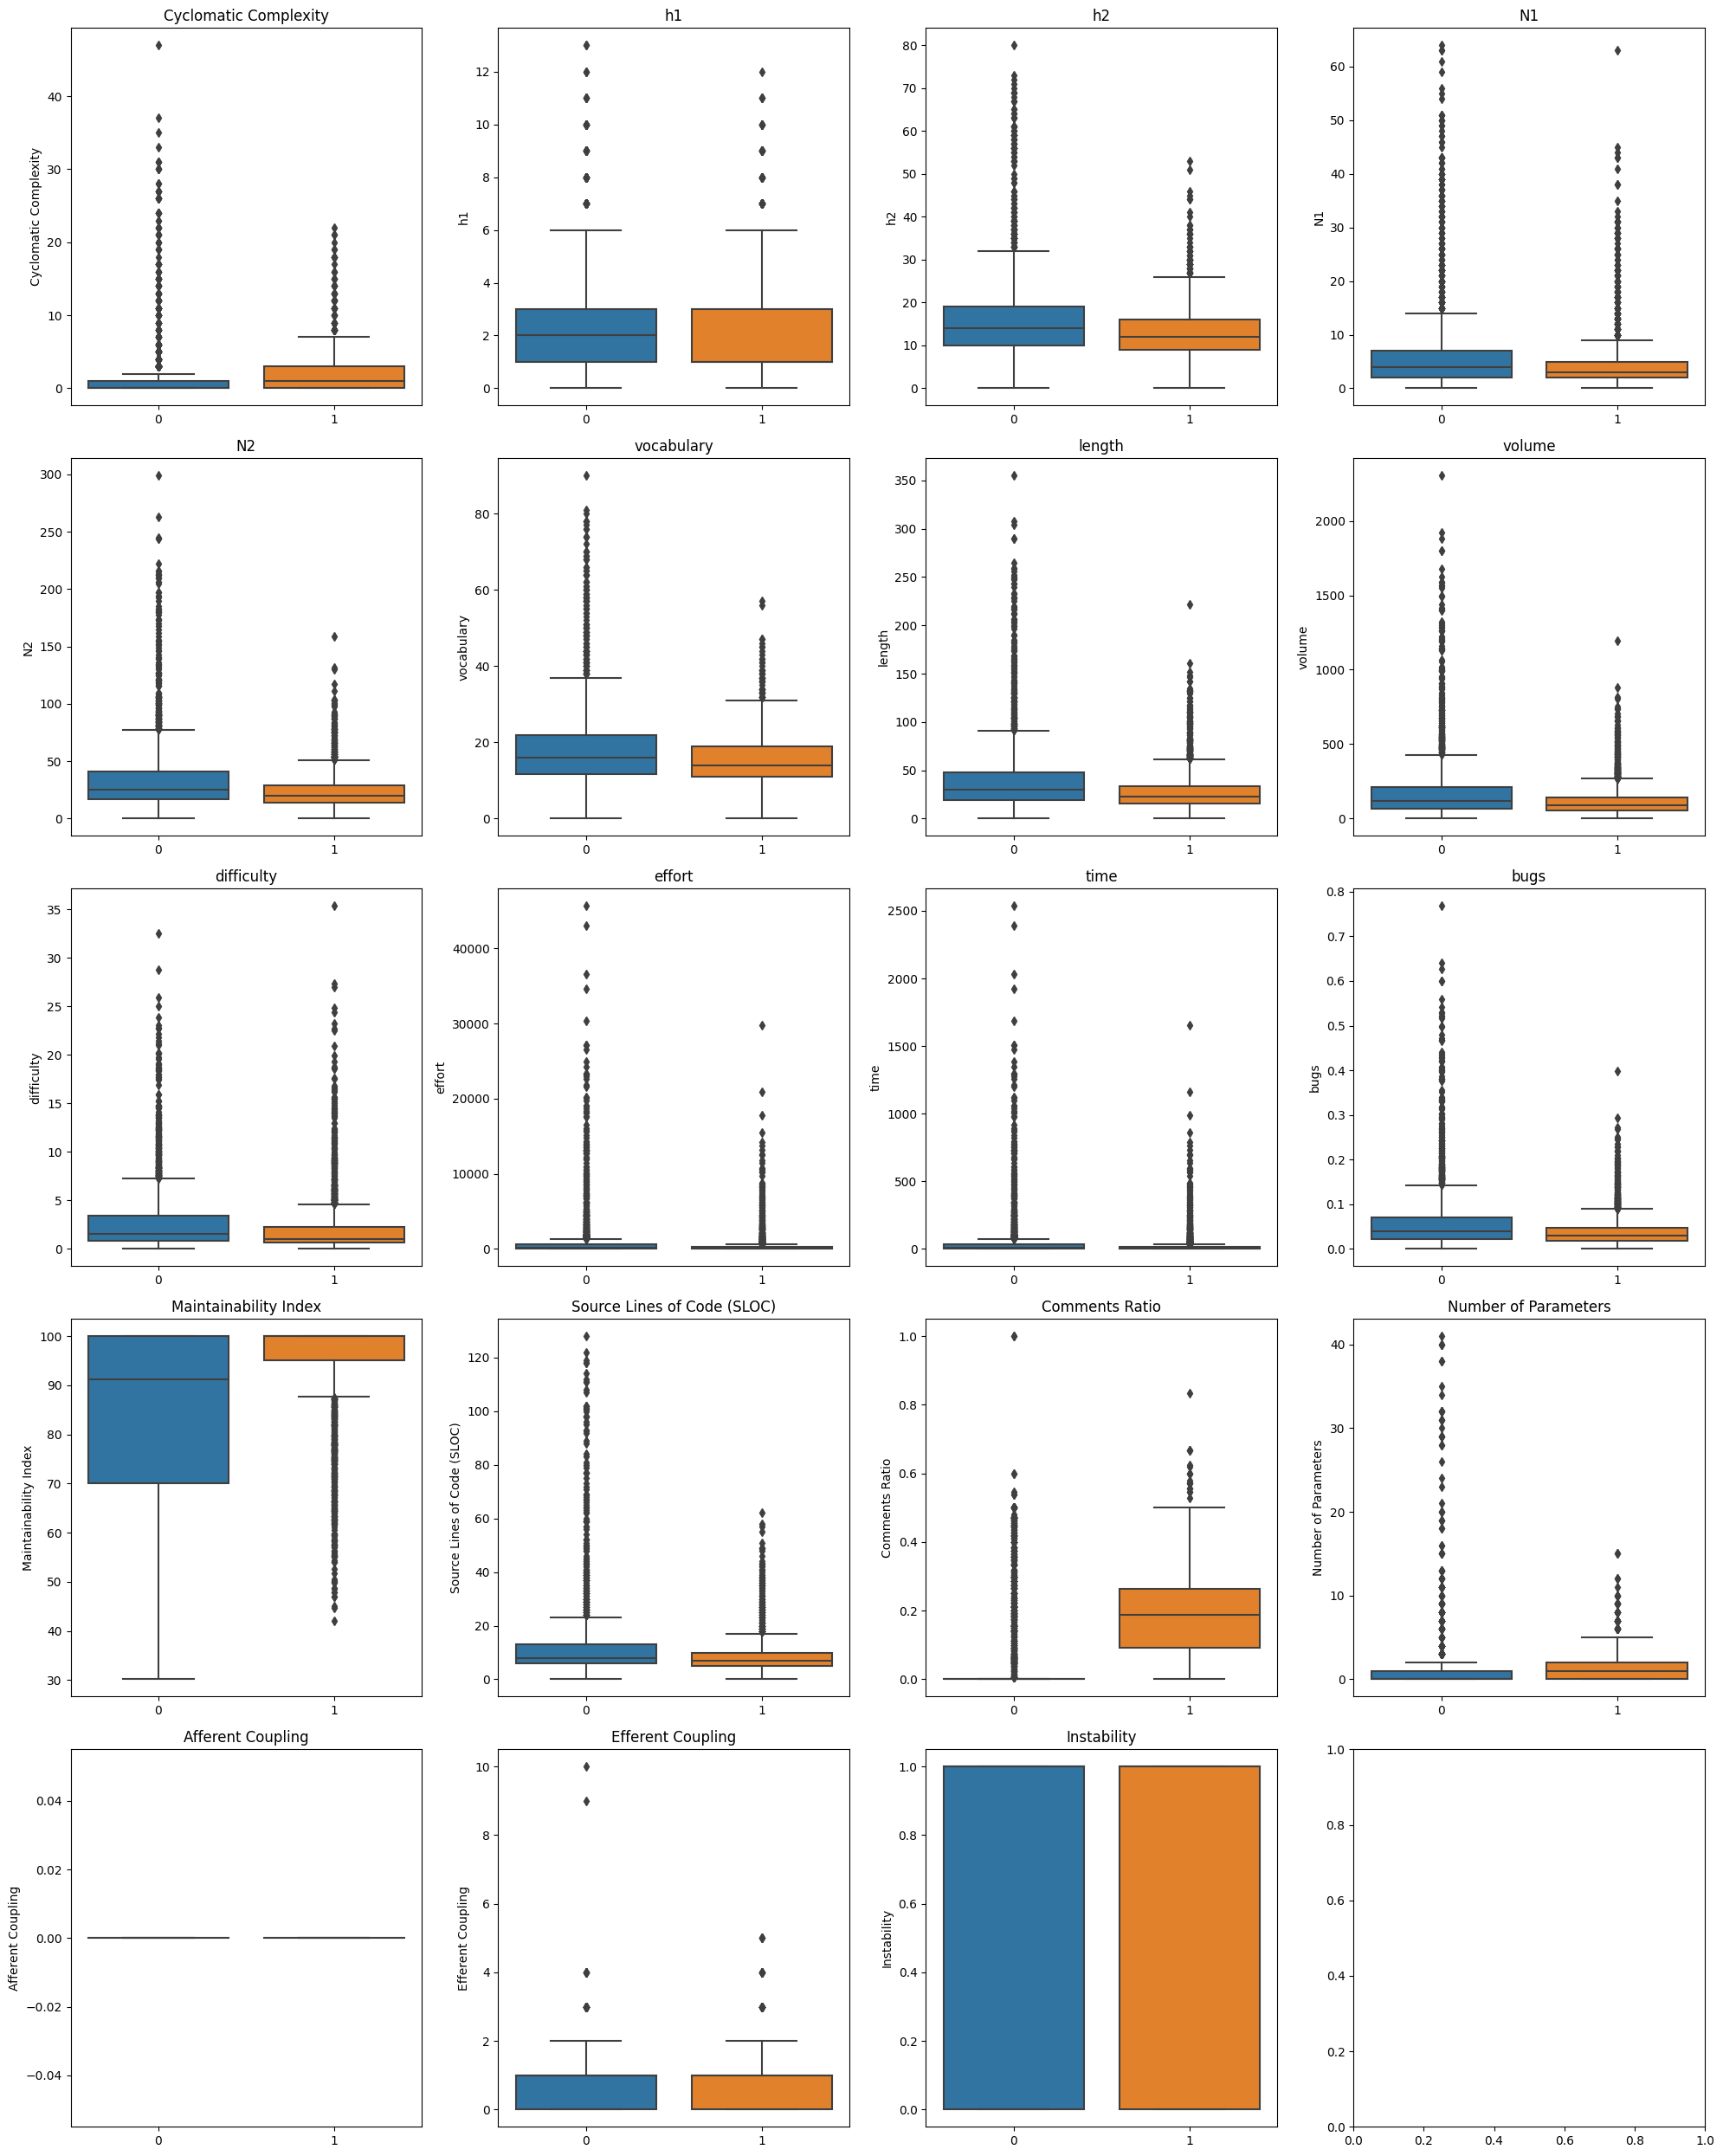

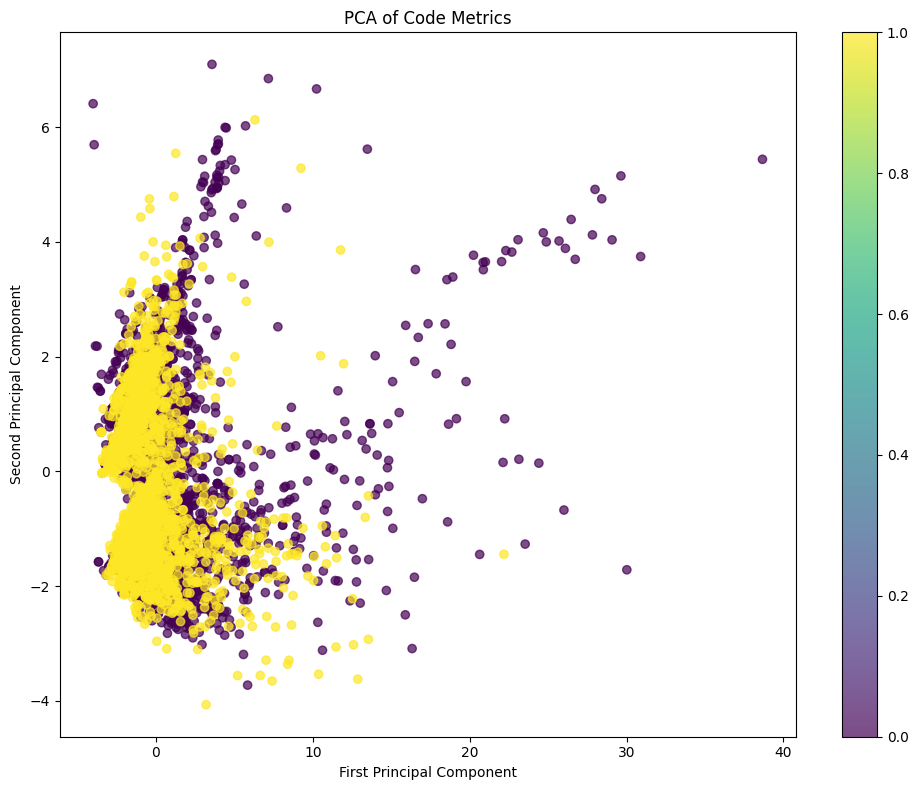

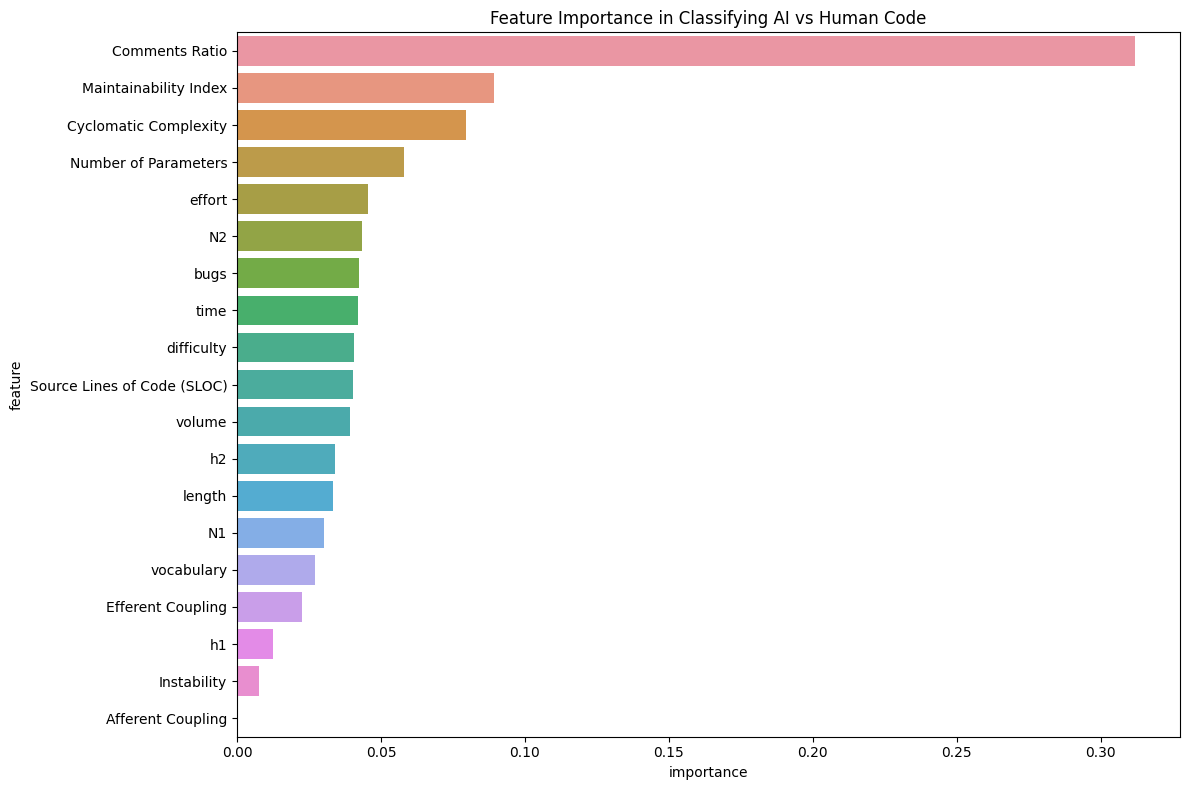

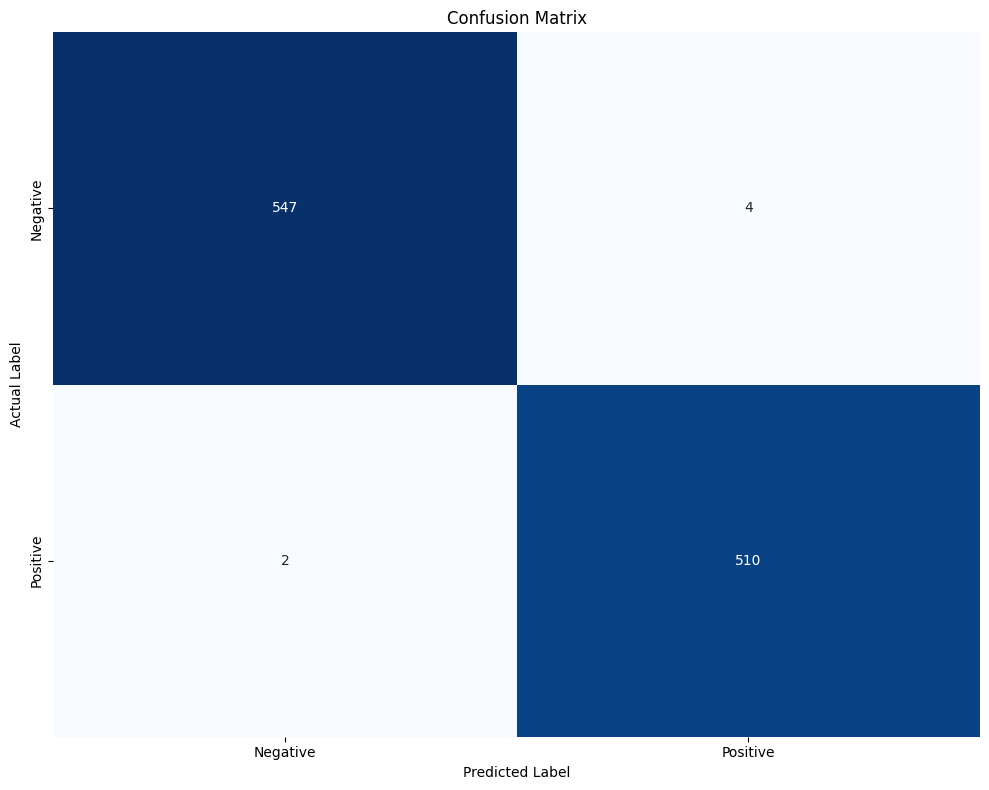

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_excel('main-dataset.xlsx')

# Drop 'Filename' and 'Syntax Errors' columns as per previous discussion
df = df.drop(['Filename', 'Syntax Errors'], axis=1)

# Separate features and target
X = df.drop('Label', axis=1)
y = df['Label']

# 1. Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Code Metrics')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Feature Distributions by Class
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.ravel()
for idx, column in enumerate(X.columns):
    sns.boxplot(x=y, y=X[column], ax=axes[idx])
    axes[idx].set_title(column)
    axes[idx].set_xlabel('')
plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Principal Component Analysis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('PCA of Code Metrics')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.tight_layout()
plt.savefig('pca_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Feature Importance (assuming you've trained a model)
# This uses the feature importance from a Random Forest Classifier as an example
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Classifying AI vs Human Code')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Confusion Matrix (assuming you've made predictions with your best model)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False, 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

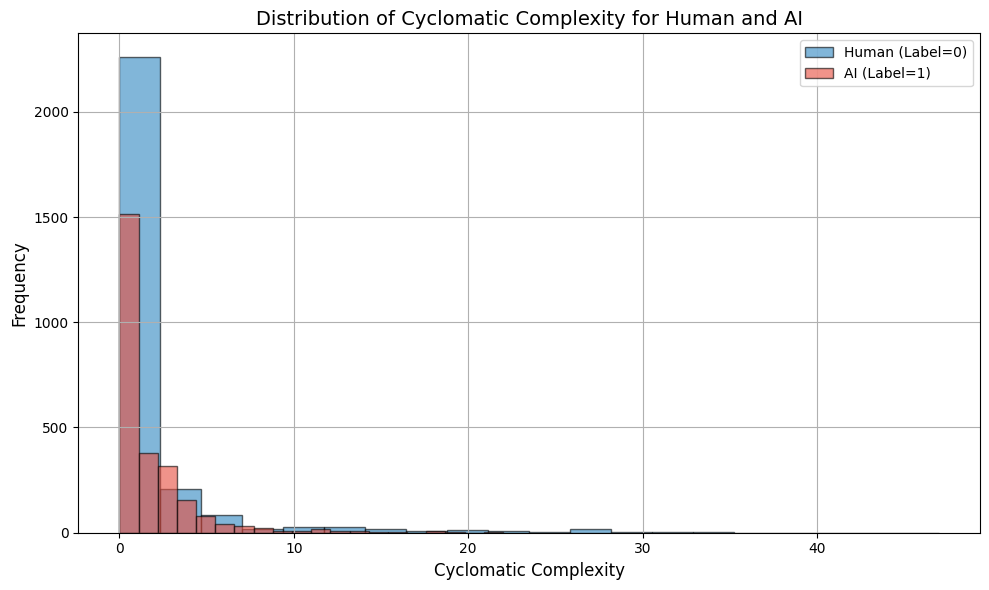

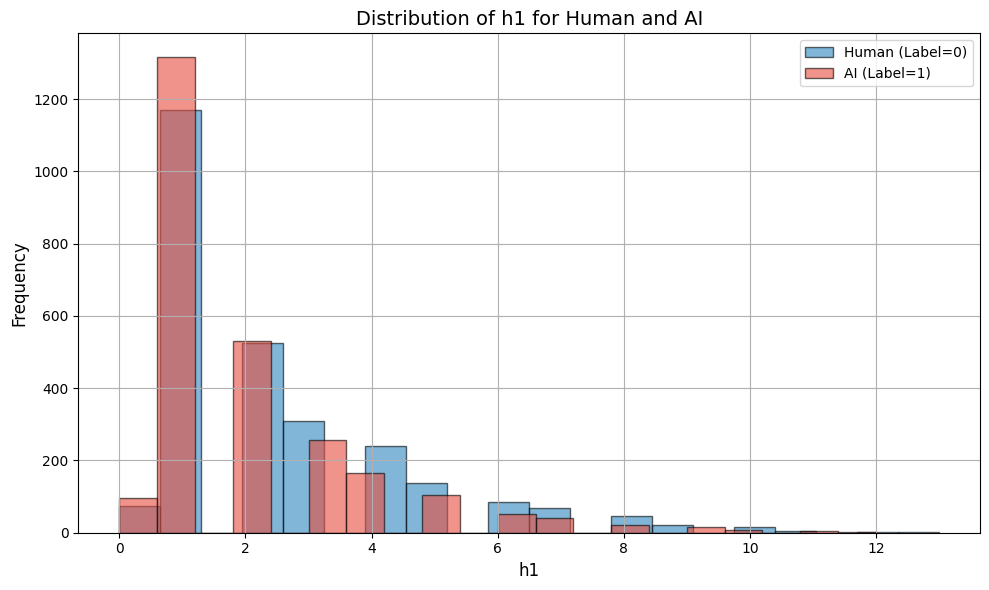

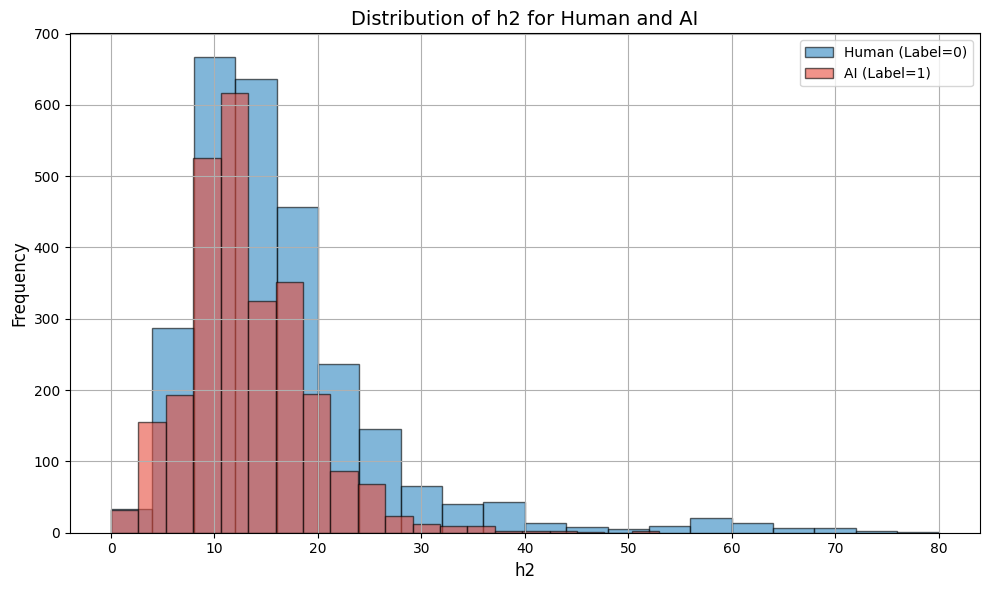

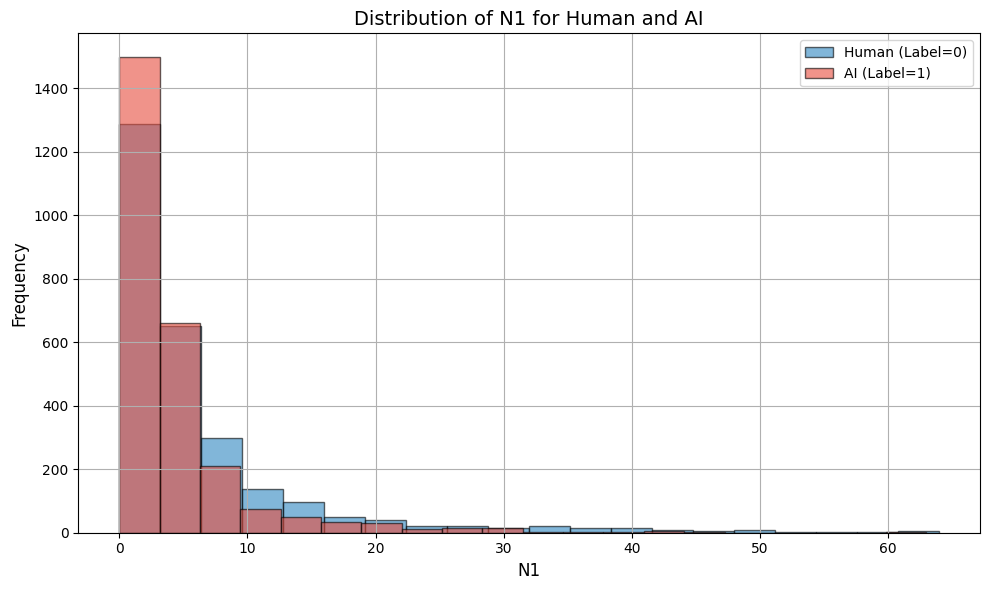

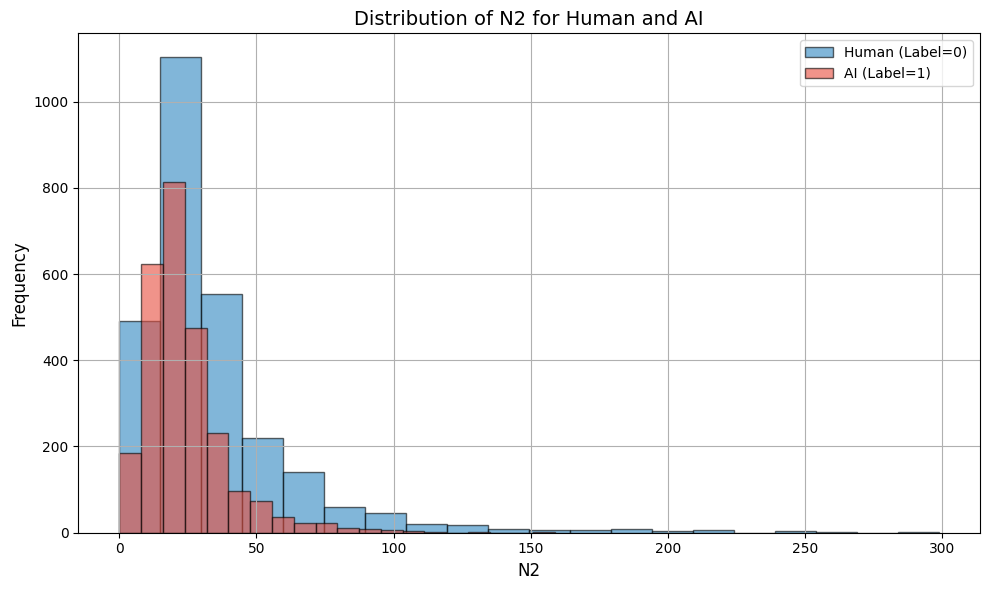

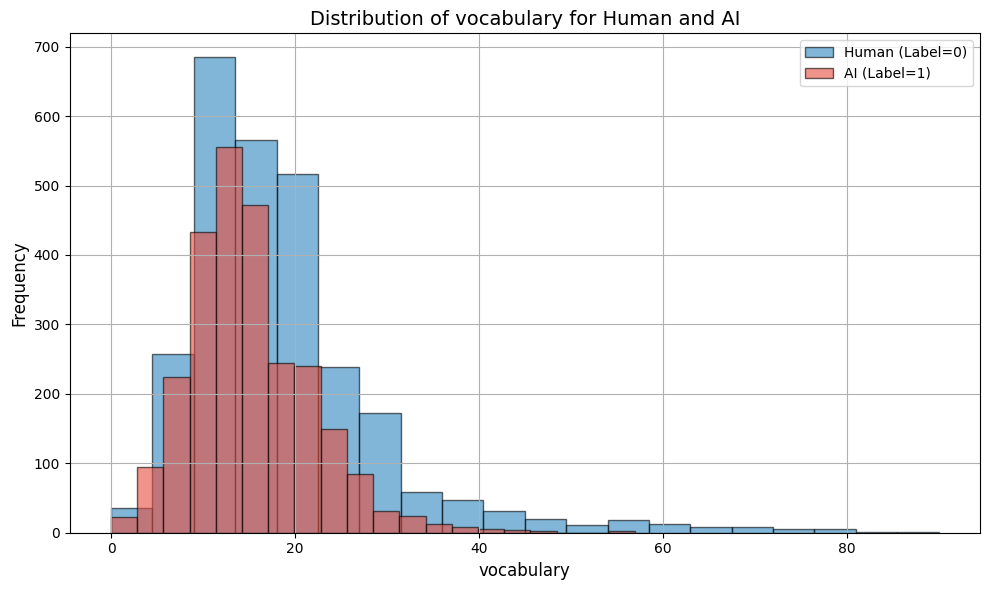

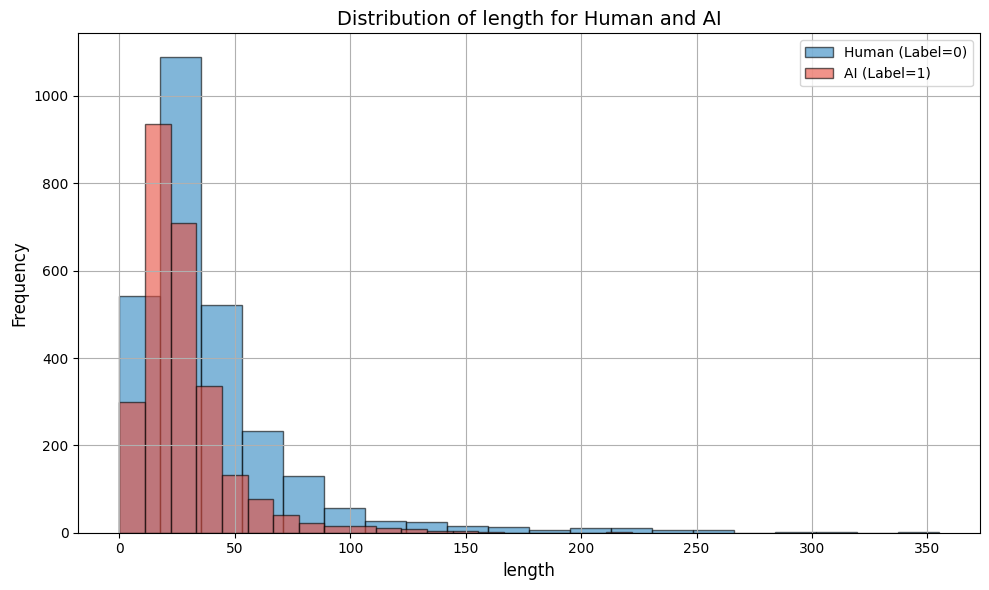

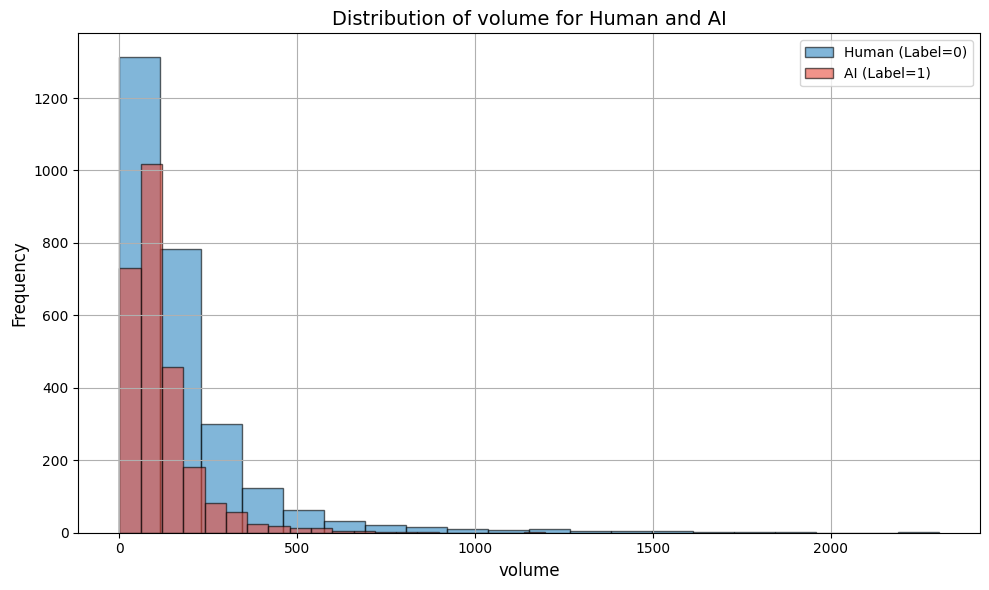

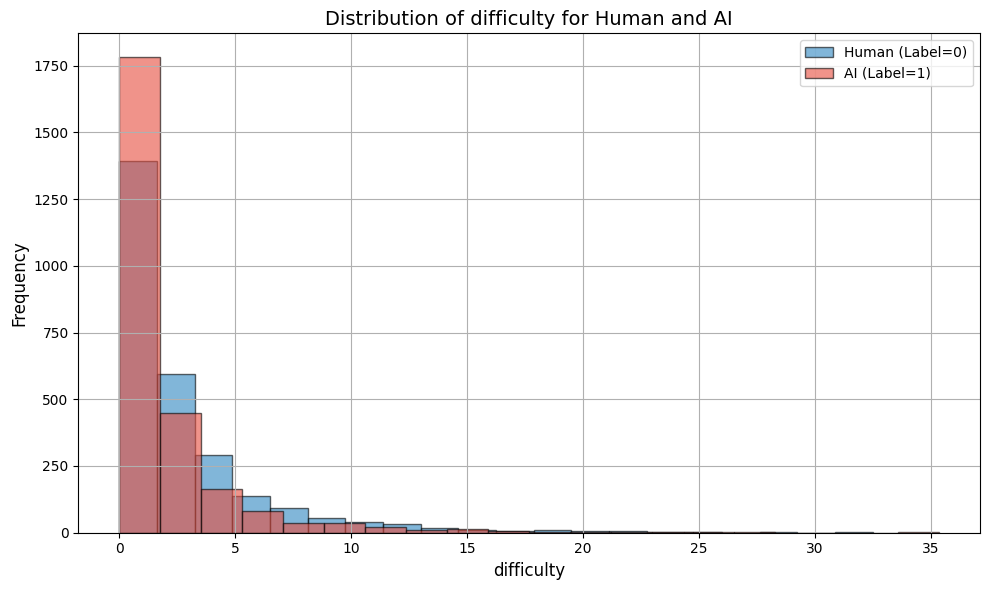

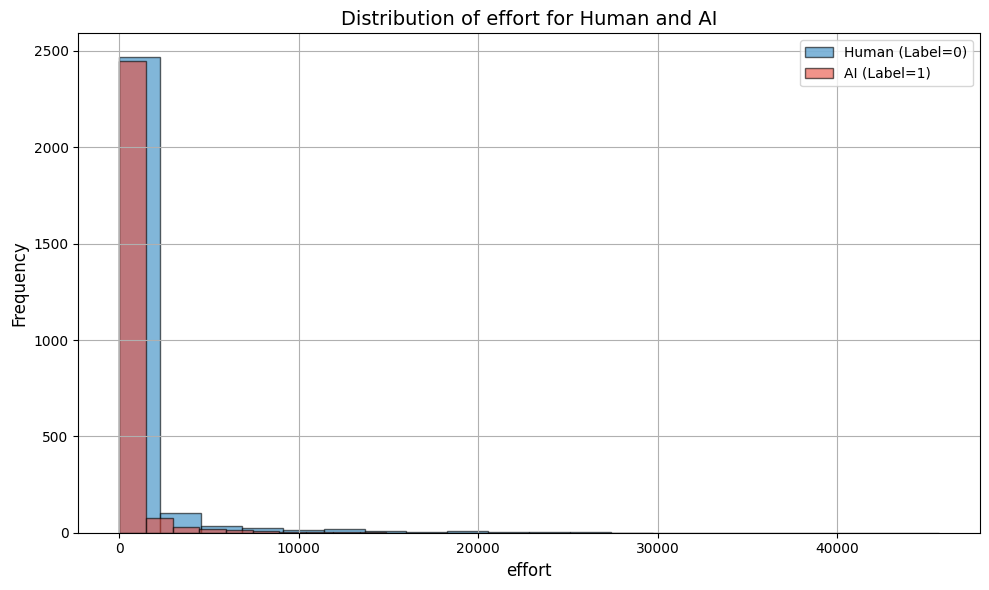

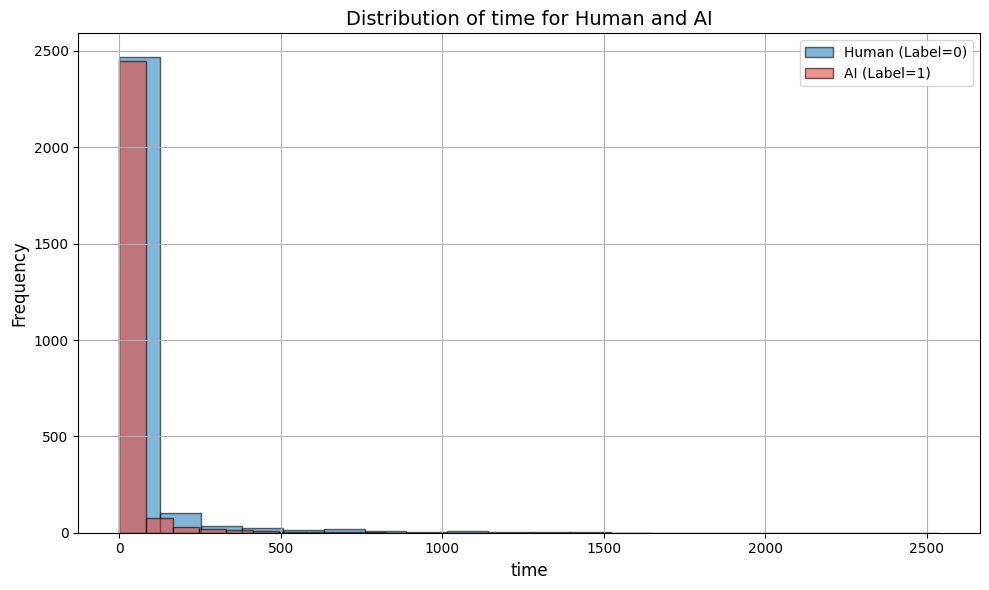

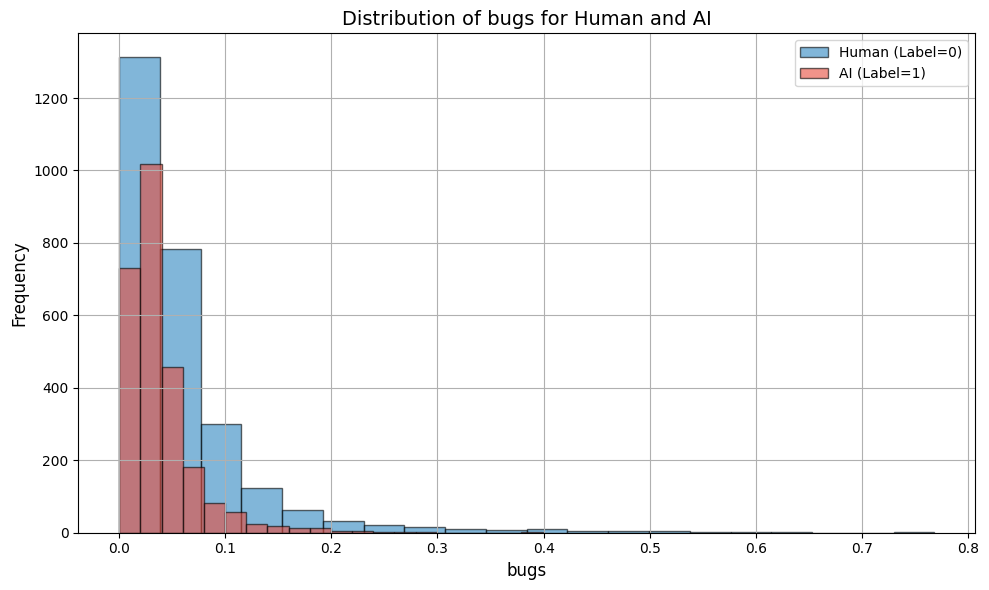

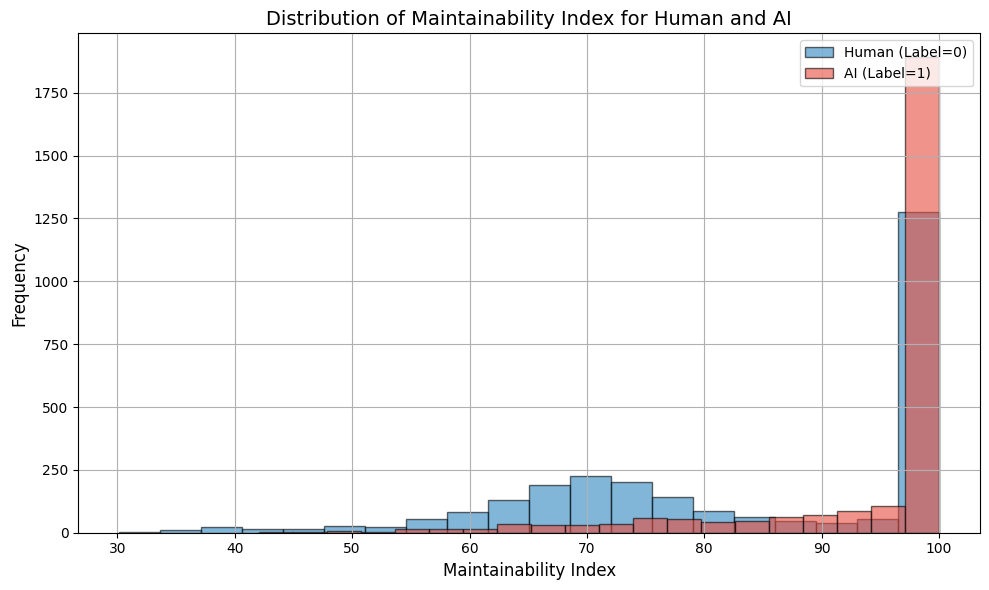

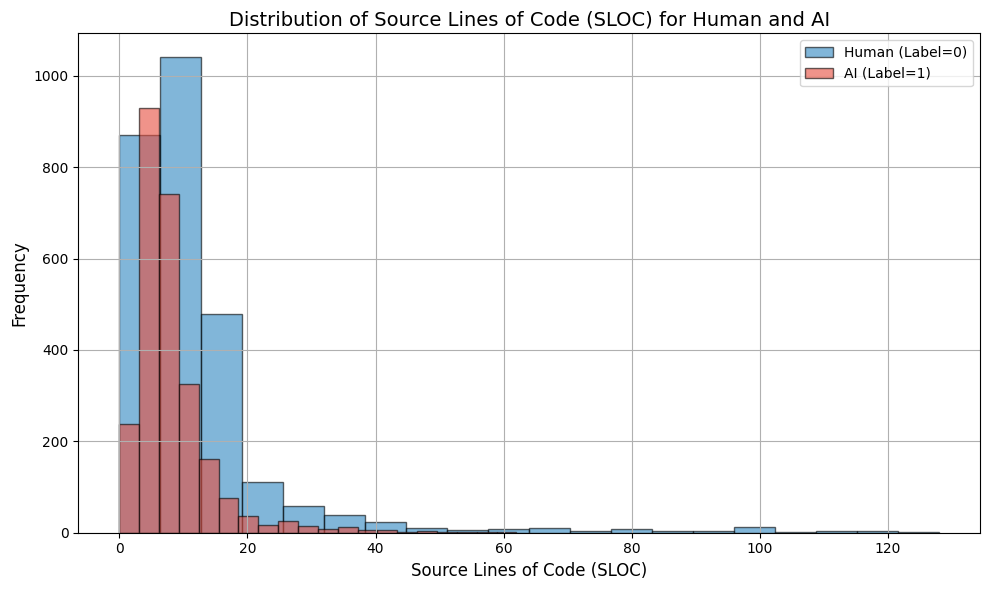

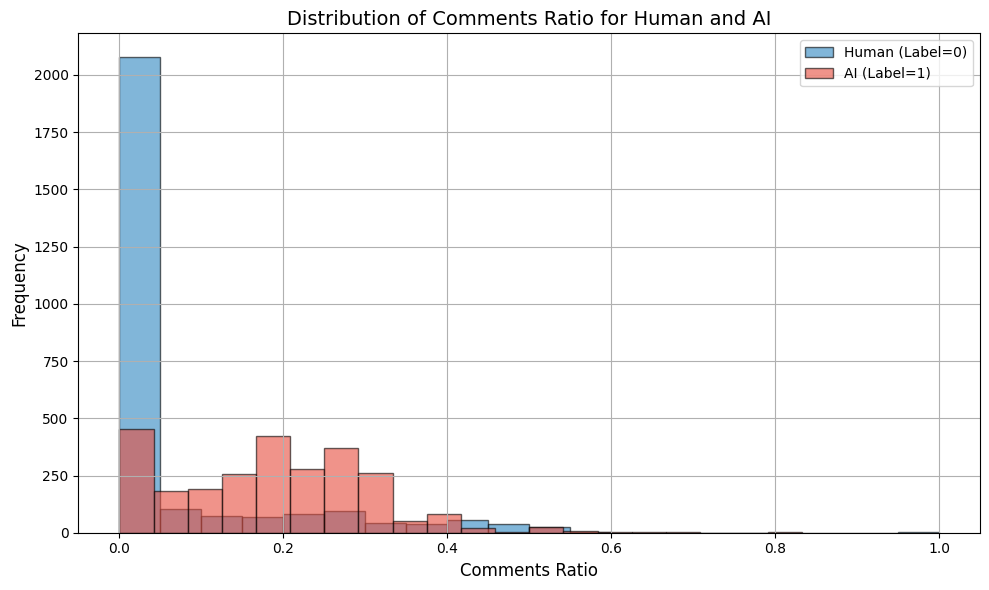

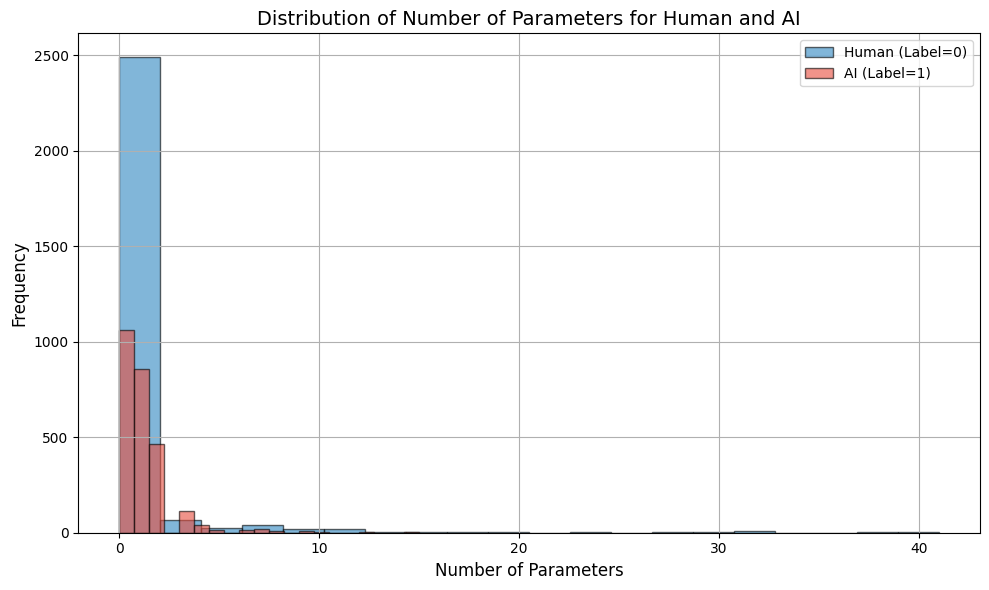

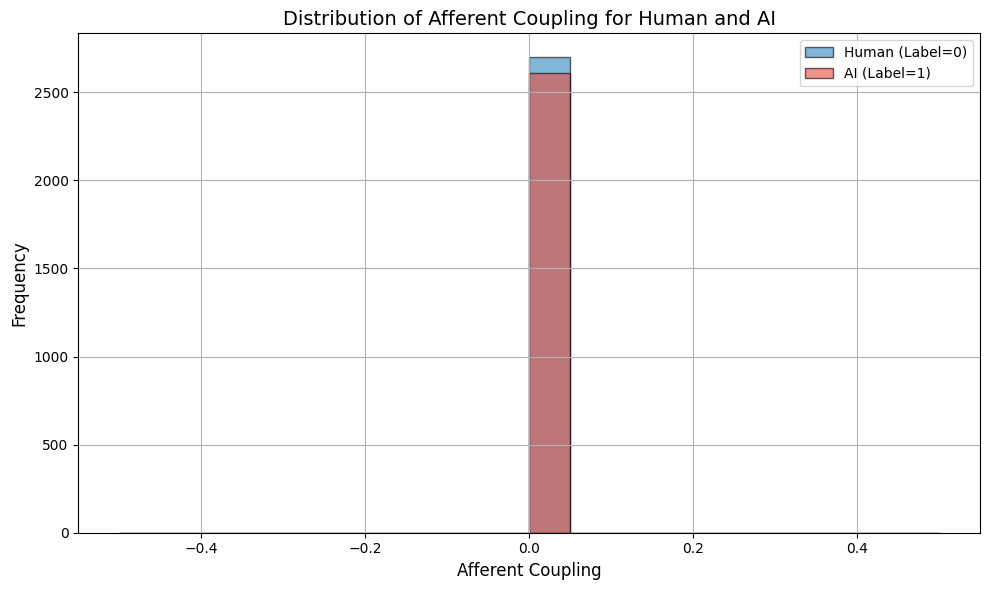

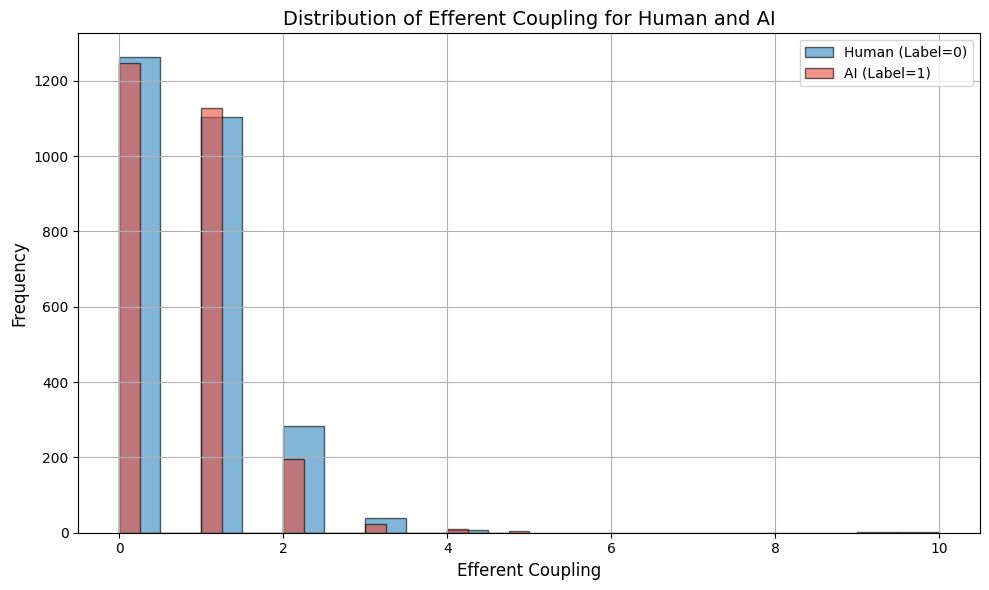

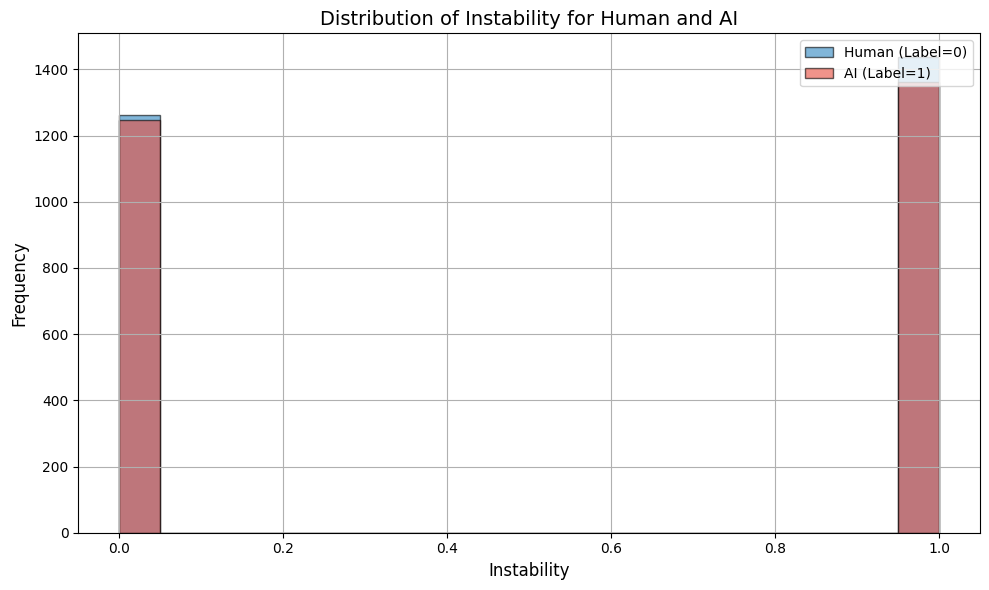

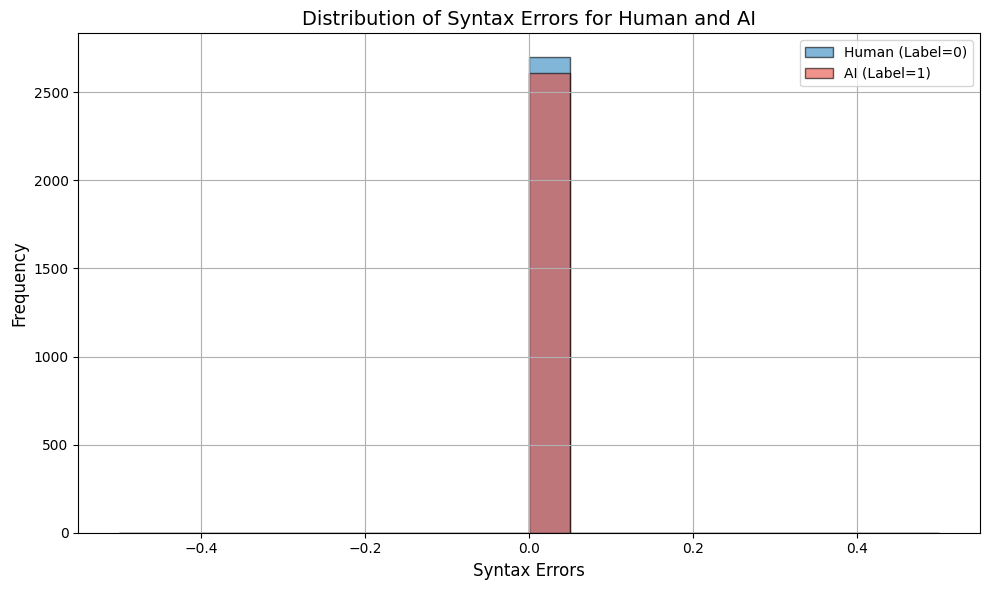

In [45]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
file_path = 'main-dataset.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Step 3: Filter the data based on Label
human_data = data[data['Label'] == 0]  # Data for human-generated code
ai_data = data[data['Label'] == 1]     # Data for AI-generated code

# Step 4: Plot the distribution for each numerical feature for human and AI labels separately
for column in data.columns:
    if data[column].dtype != 'object' and column != 'Label':  # Skip non-numerical columns and the label column
        plt.figure(figsize=(10, 6))
        
        # Plot human label data (Label = 0) using a professional color
        plt.hist(human_data[column], bins=20, alpha=0.6, label='Human (Label=0)', color='#2E86C1', edgecolor='black')
        
        # Plot AI label data (Label = 1) using a different professional color
        plt.hist(ai_data[column], bins=20, alpha=0.6, label='AI (Label=1)', color='#E74C3C', edgecolor='black')
        
        plt.title(f'Distribution of {column} for Human and AI', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


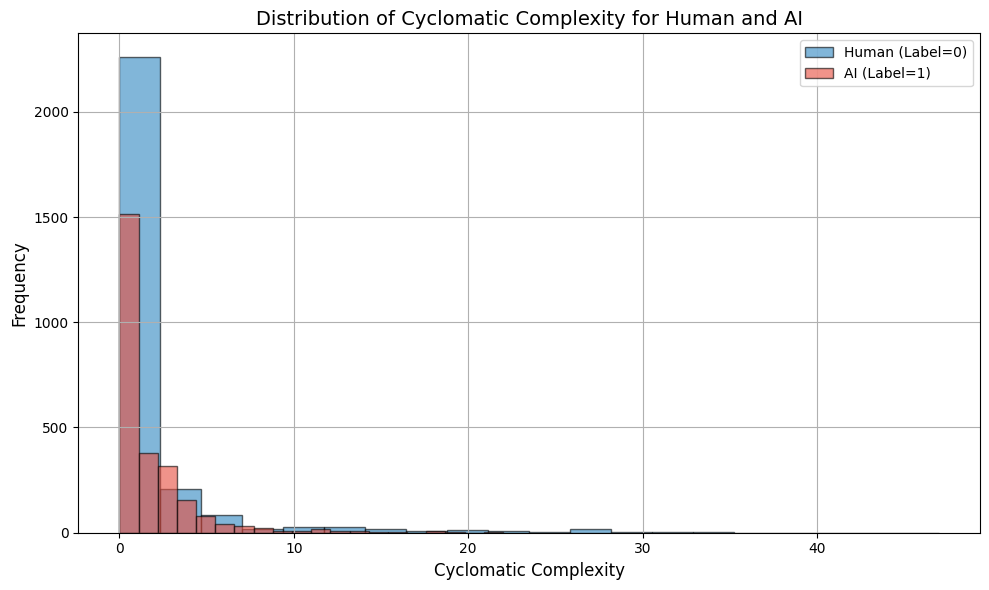

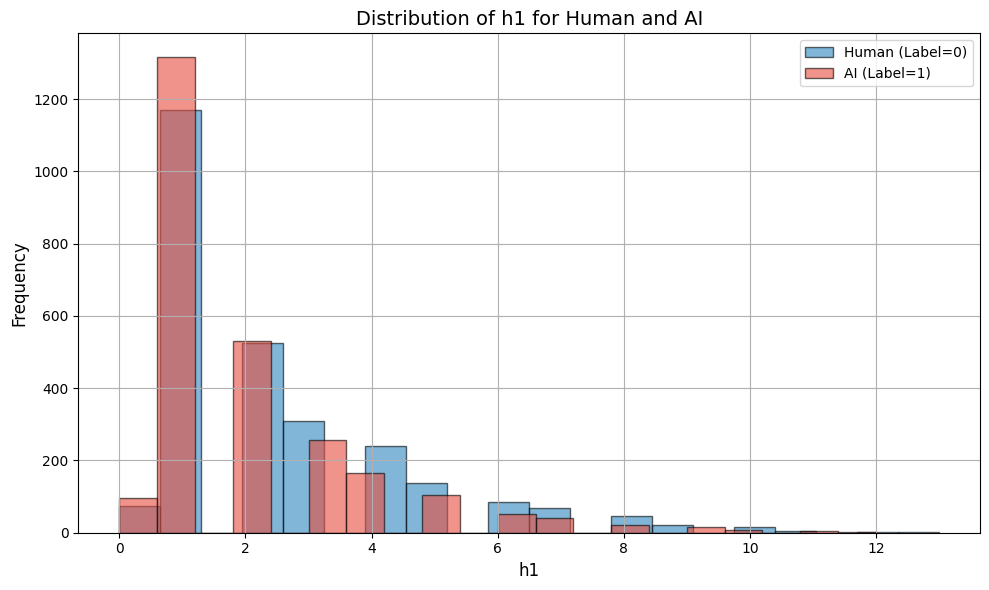

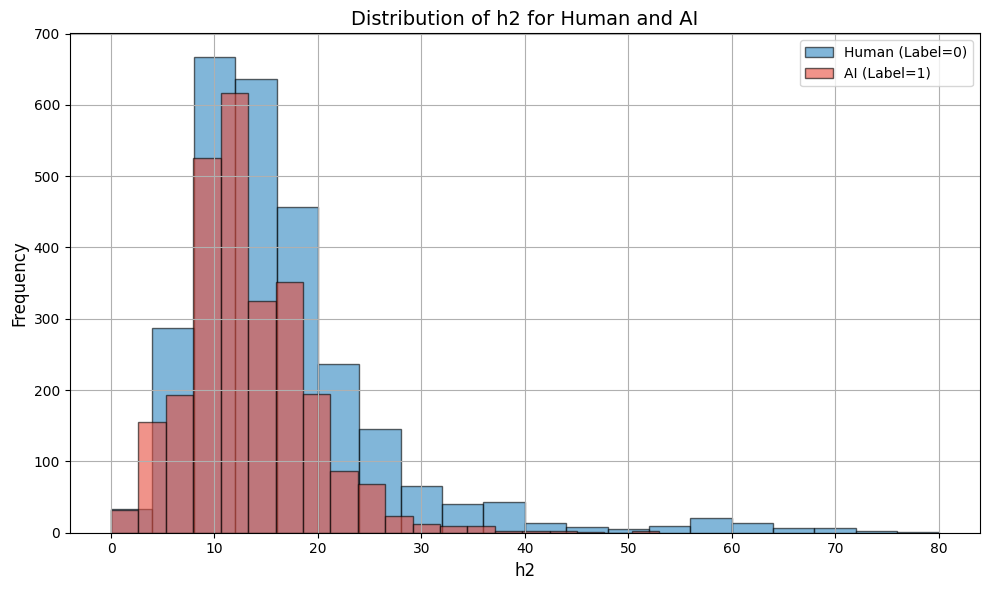

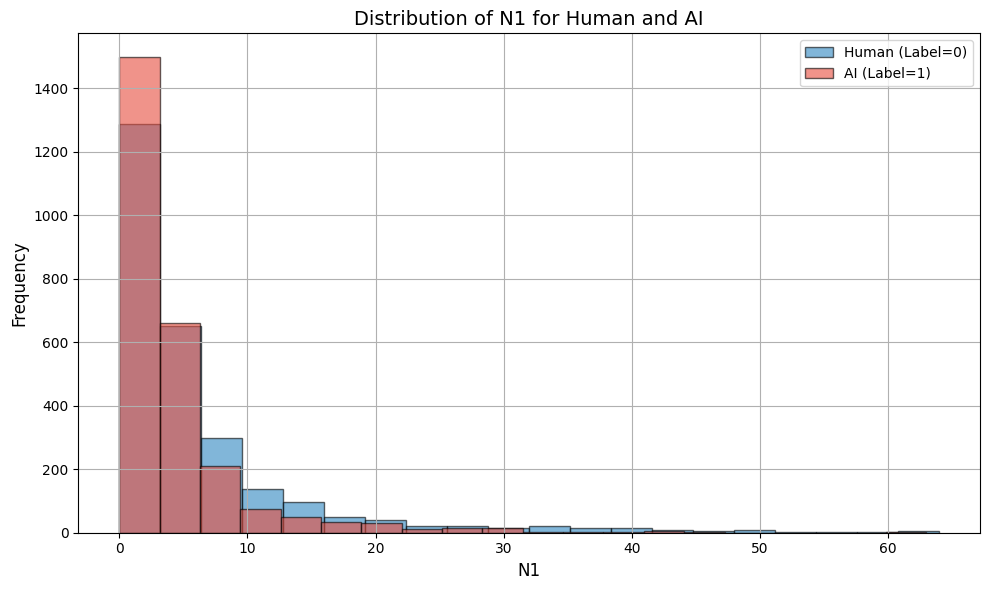

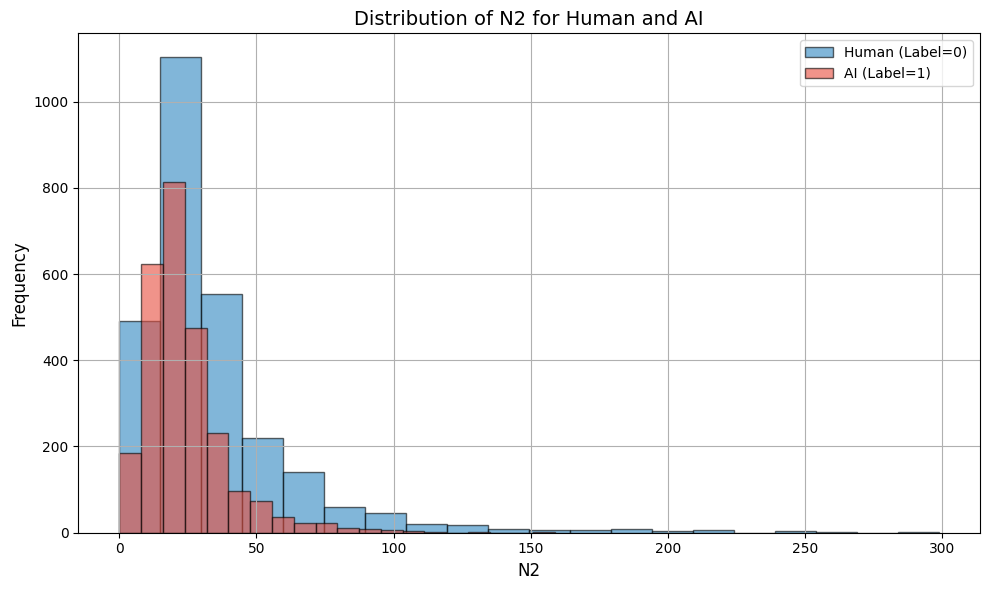

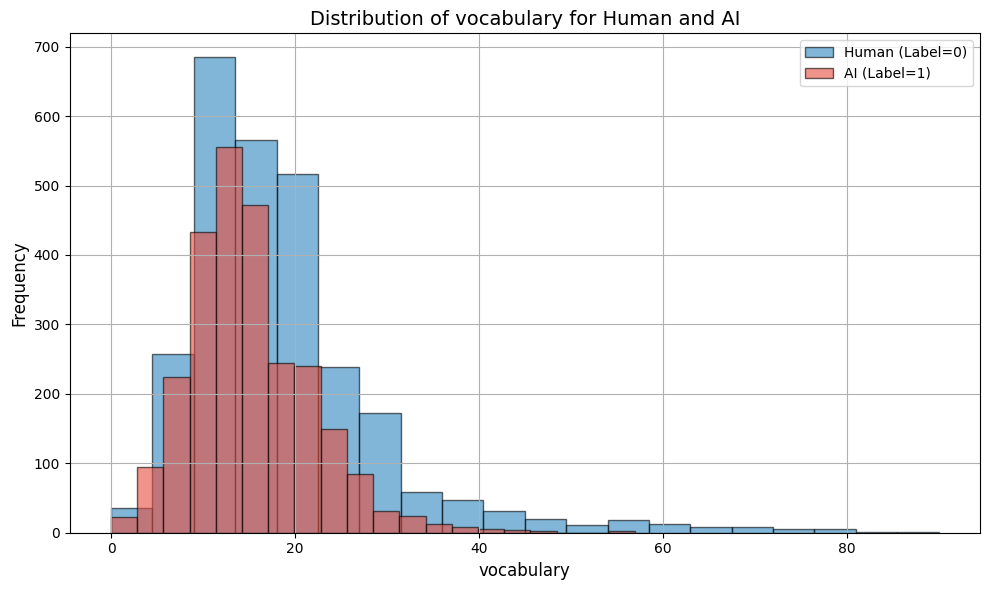

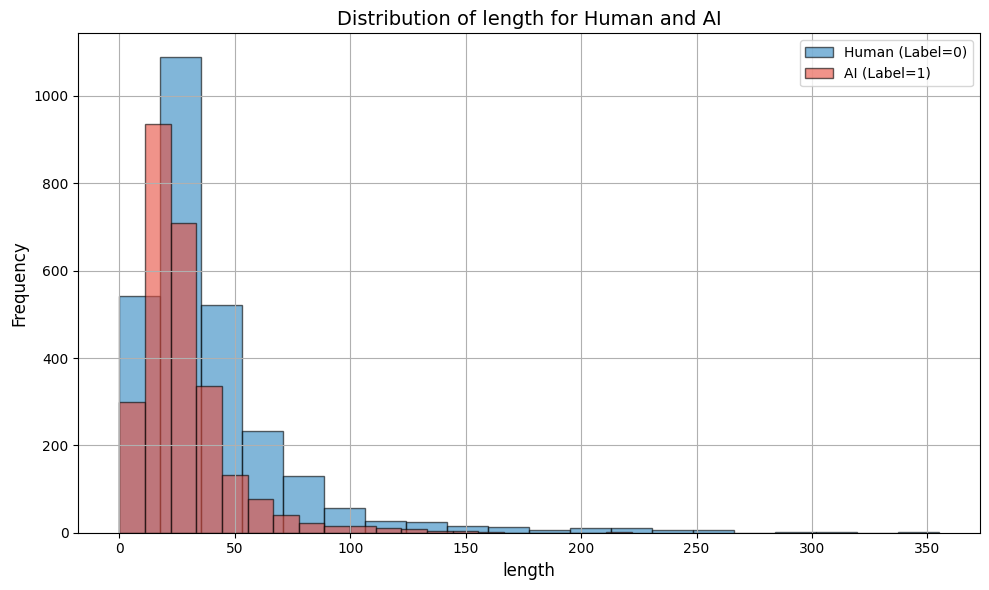

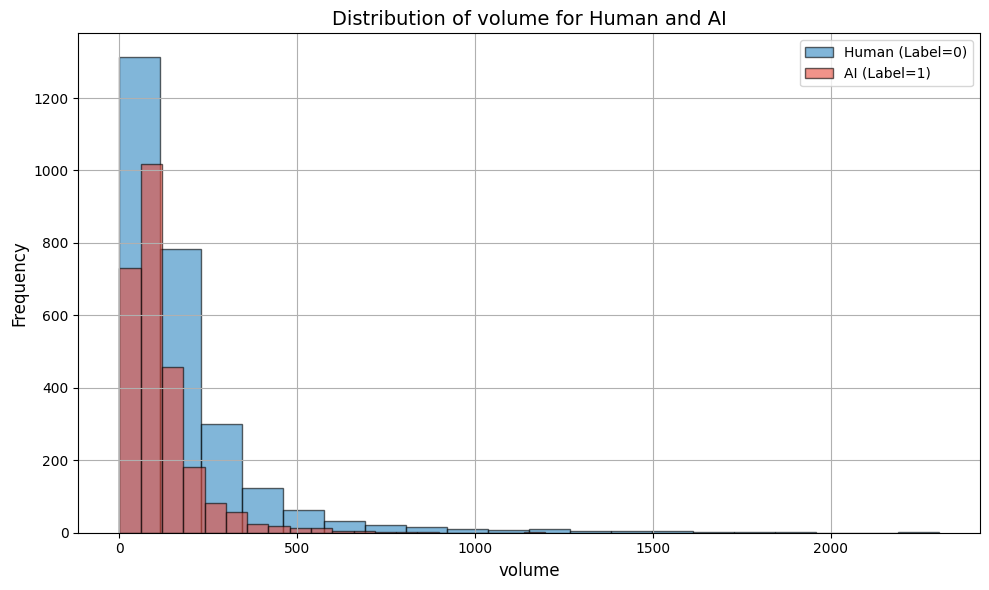

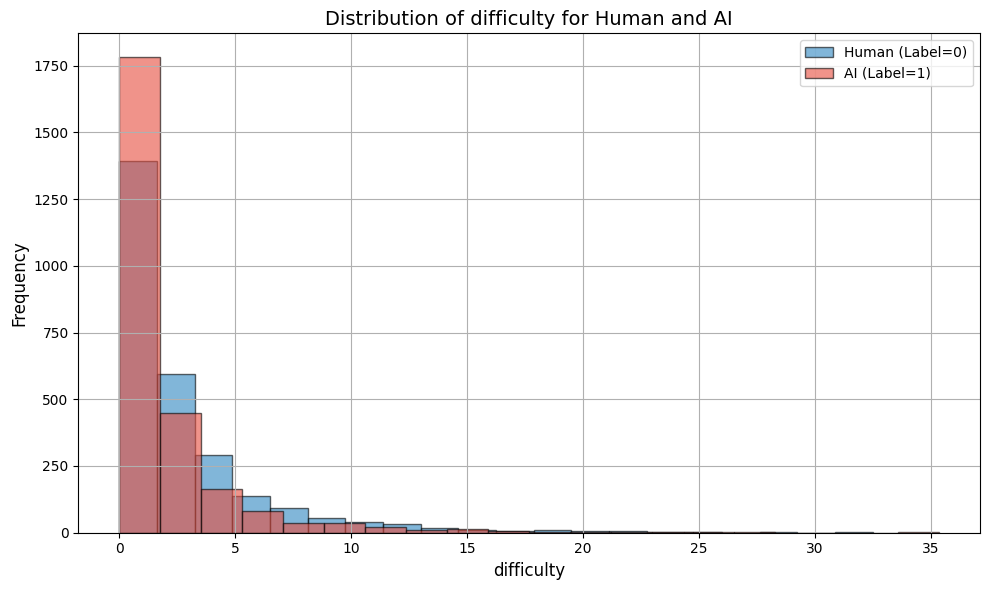

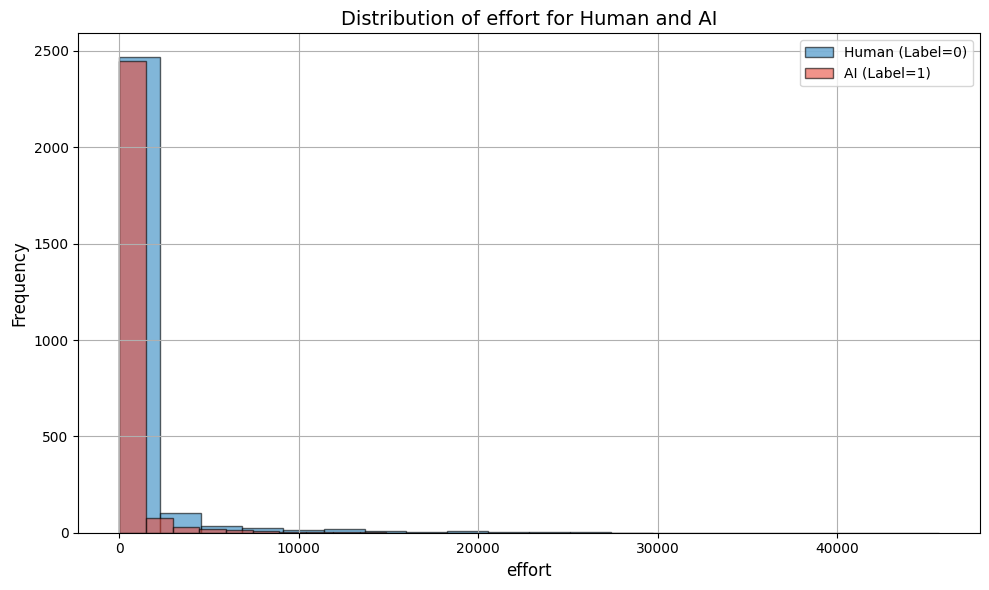

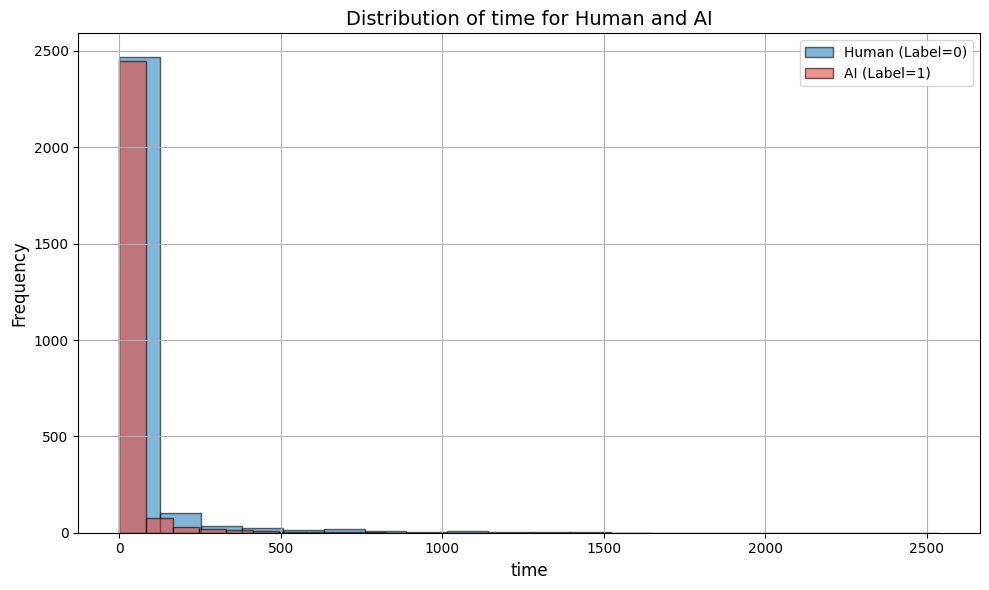

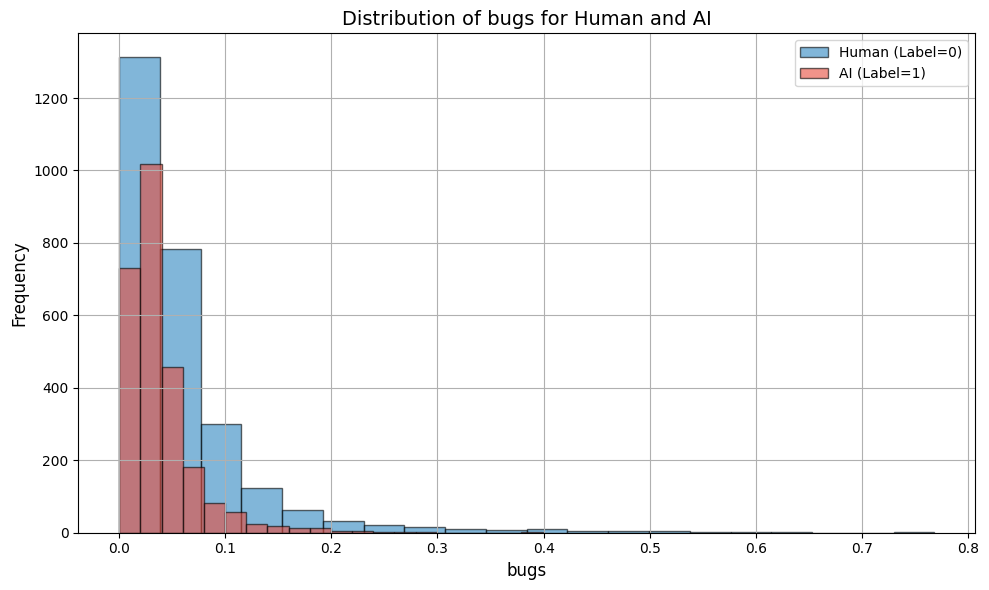

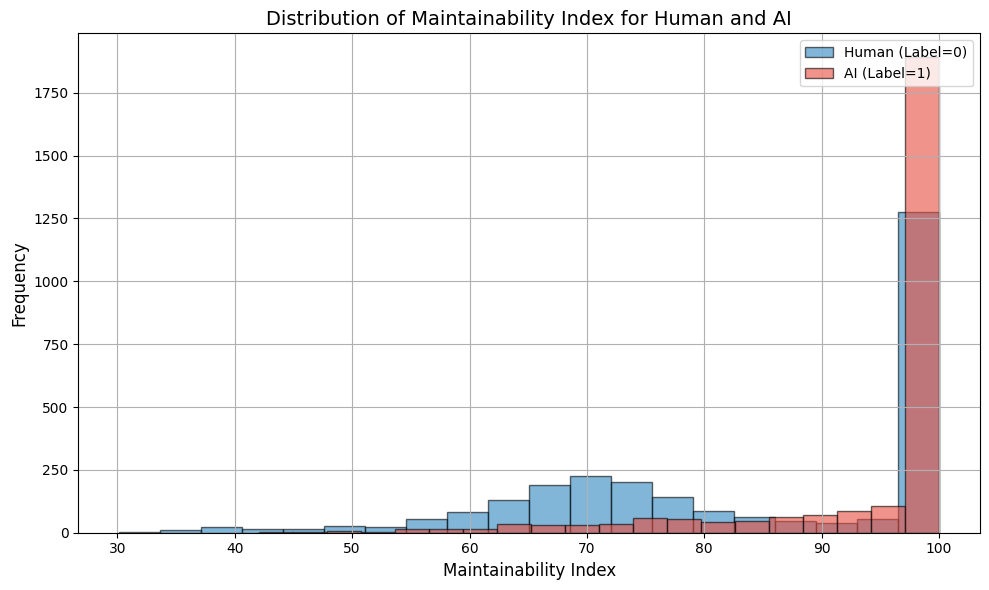

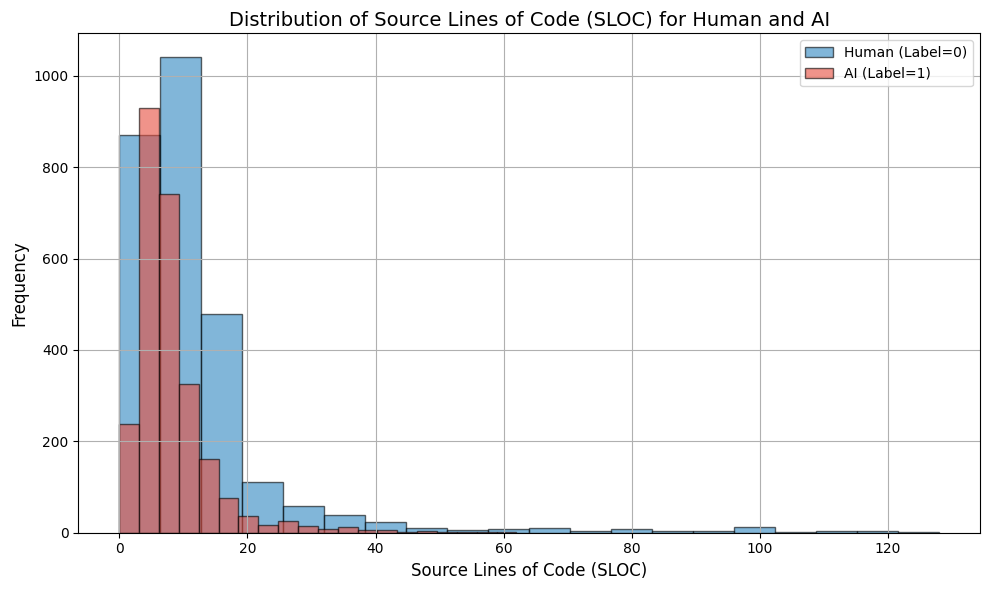

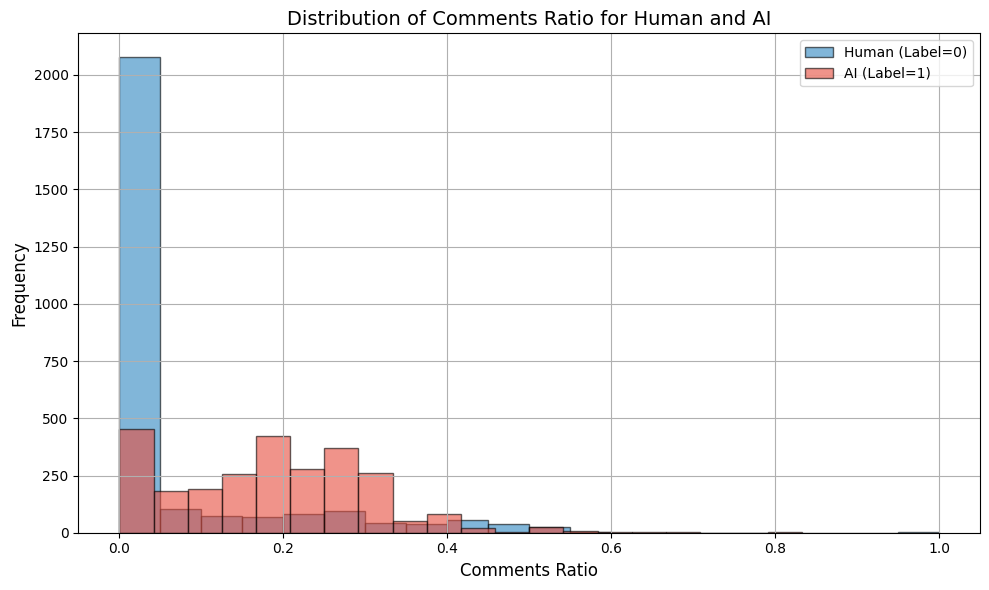

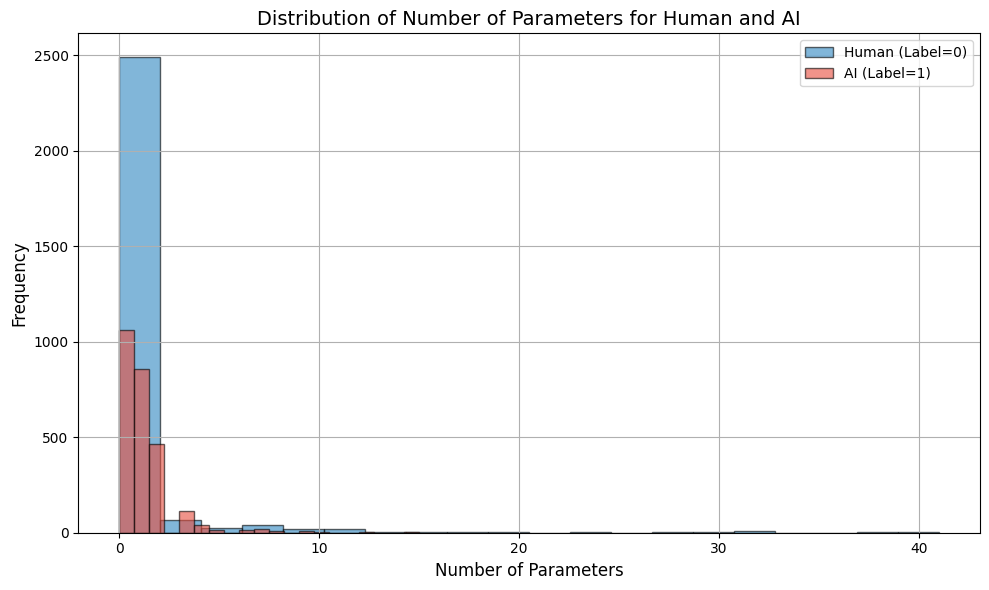

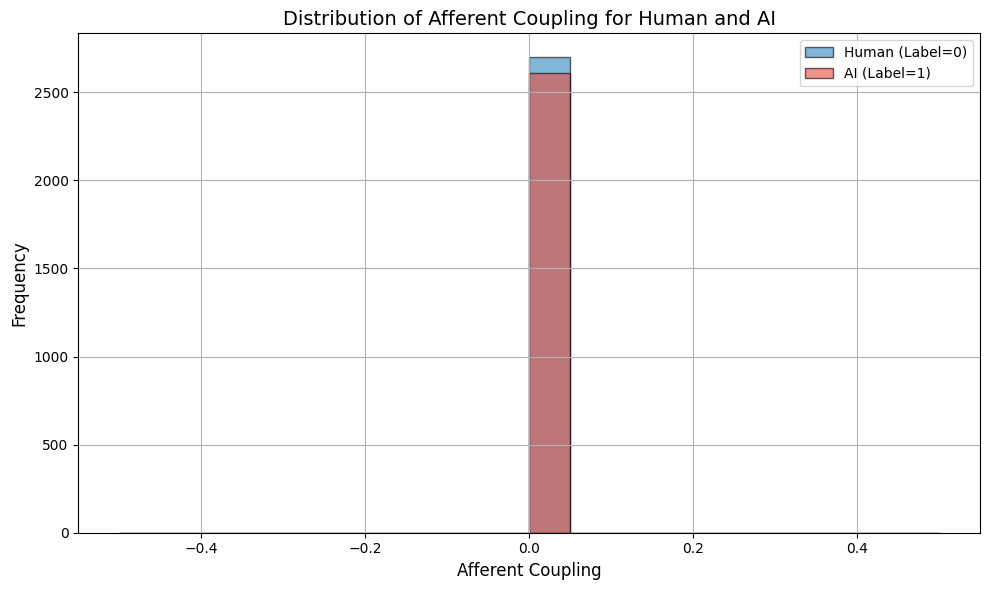

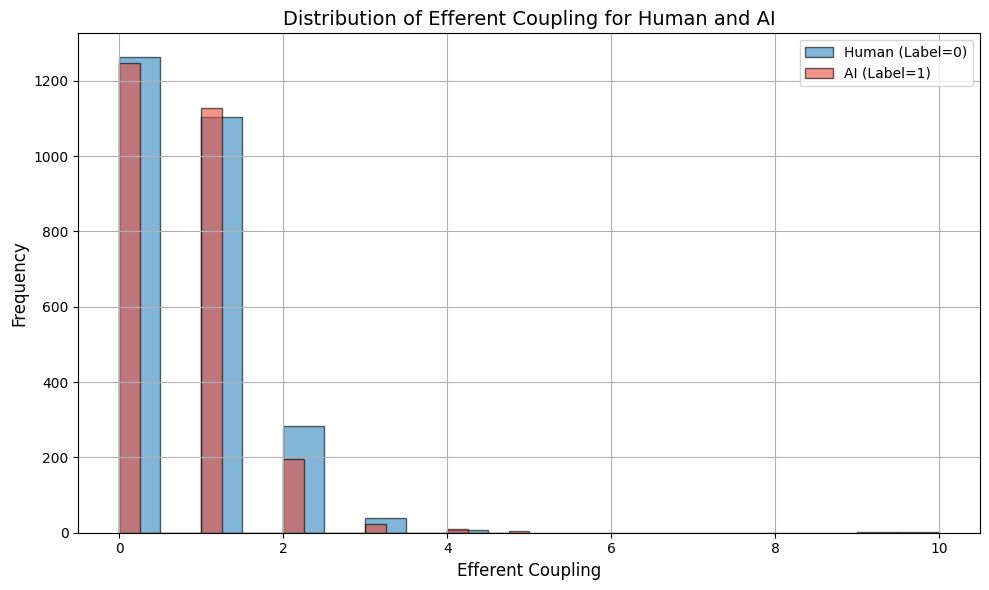

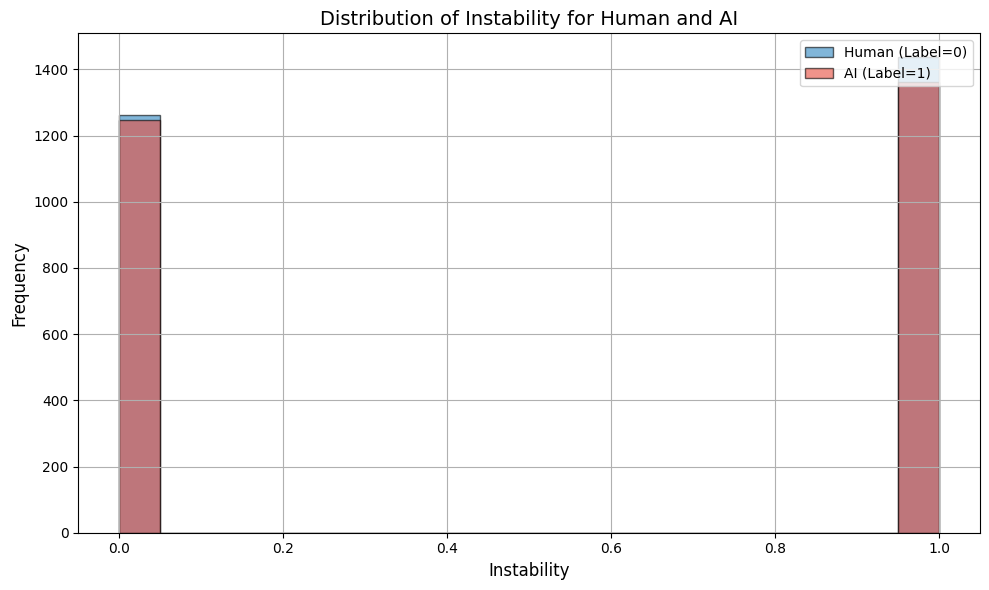

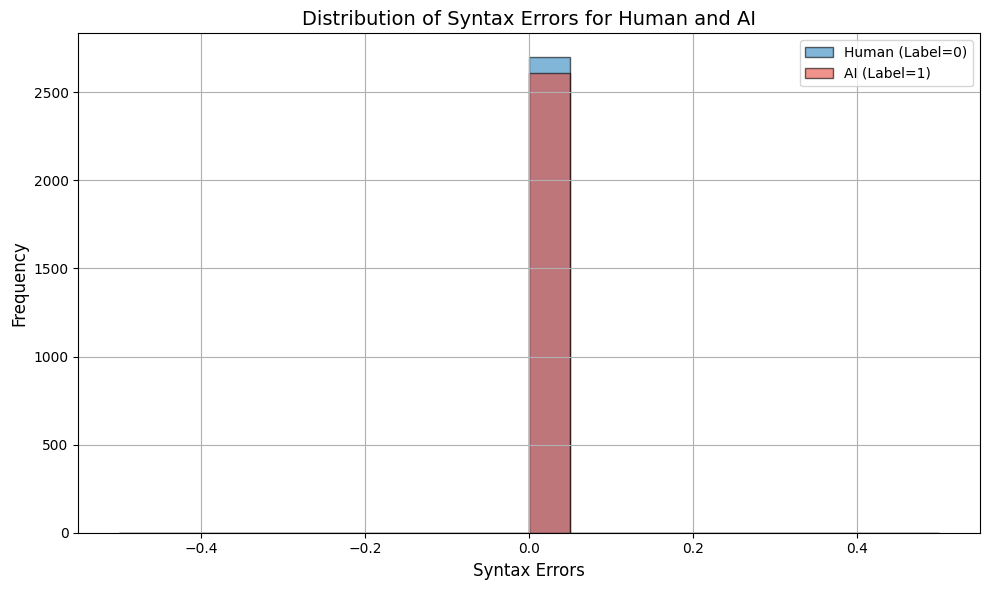

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
file_path = 'main-dataset.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Step 3: Filter the data based on Label
human_data = data[data['Label'] == 0]  # Data for human-generated code
ai_data = data[data['Label'] == 1]     # Data for AI-generated code

# Step 4: Plot the distribution for each numerical feature for human and AI labels separately
for column in data.columns:
    if data[column].dtype != 'object' and column != 'Label':  # Skip non-numerical columns and the label column
        plt.figure(figsize=(10, 6))
        
        # Plot human label data (Label = 0) using a professional color
        plt.hist(human_data[column], bins=20, alpha=0.6, label='Human (Label=0)', color='#2E86C1', edgecolor='black')
        
        # Plot AI label data (Label = 1) using a different professional color
        plt.hist(ai_data[column], bins=20, alpha=0.6, label='AI (Label=1)', color='#E74C3C', edgecolor='black')
        
        plt.title(f'Distribution of {column} for Human and AI', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


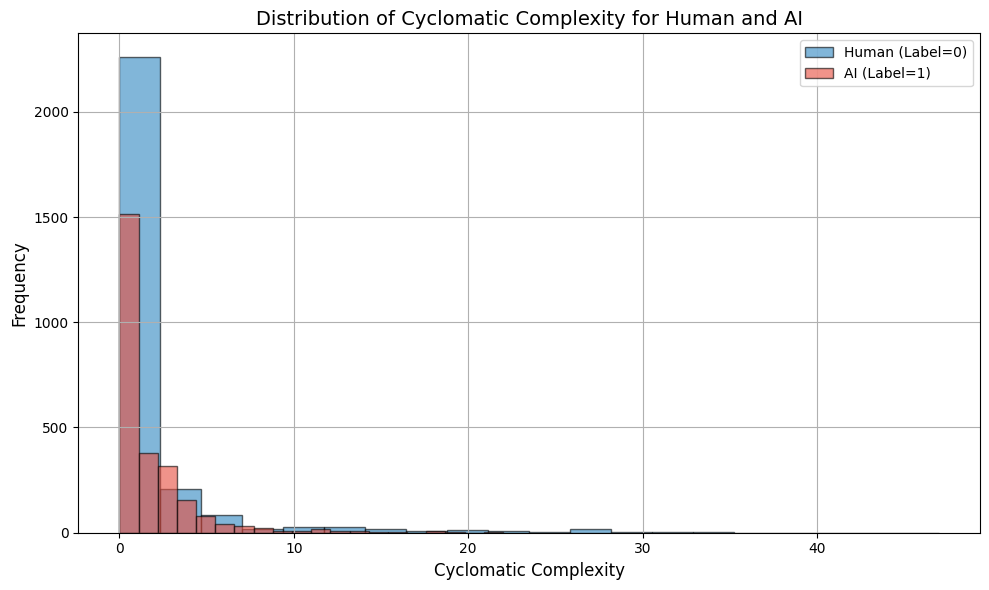

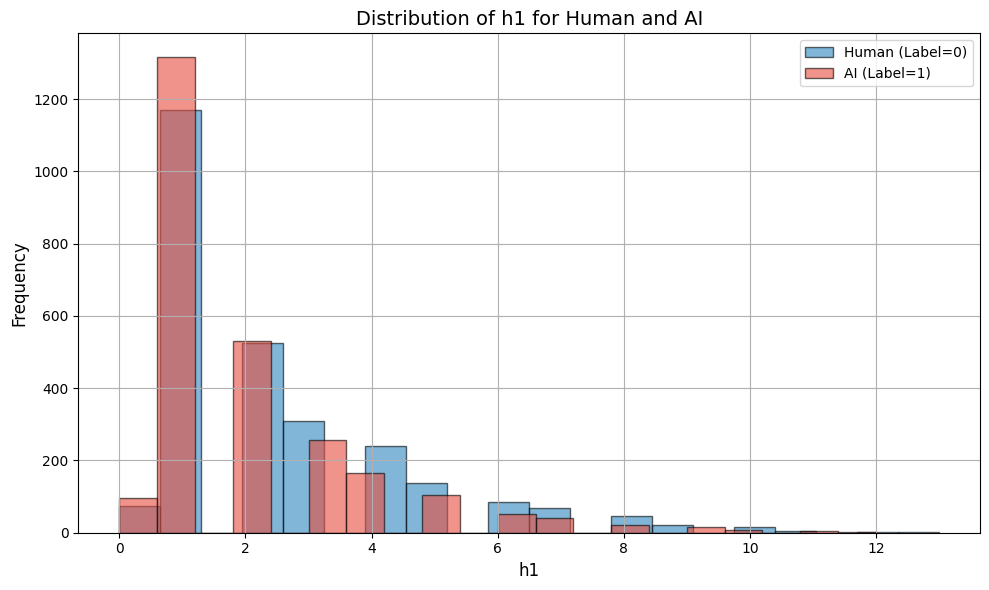

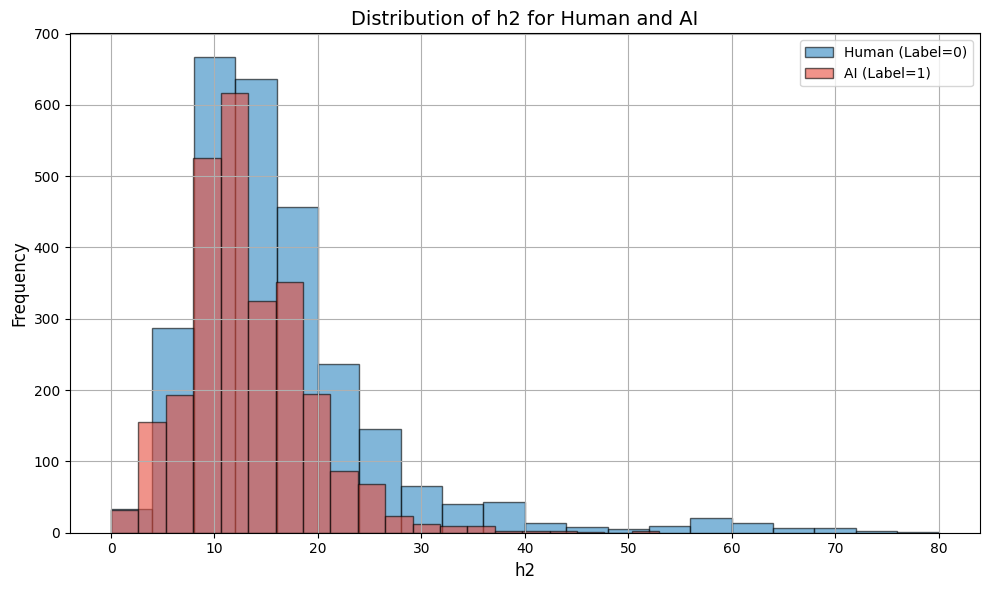

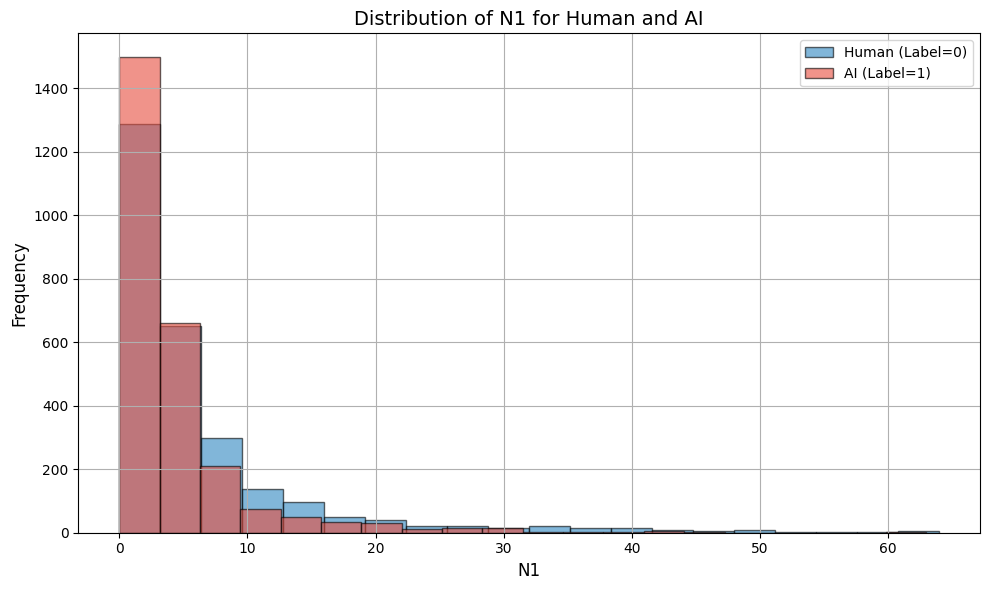

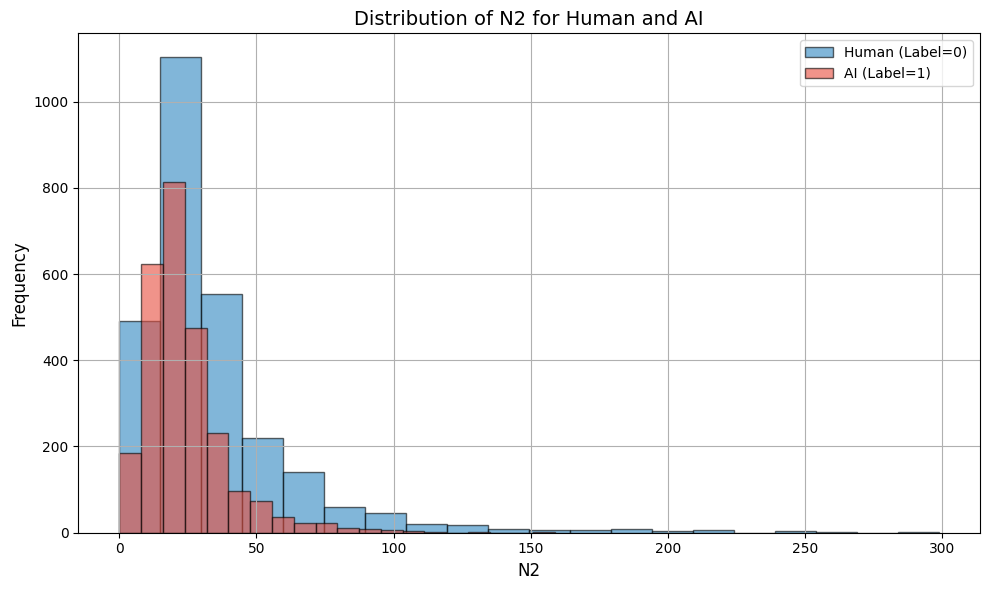

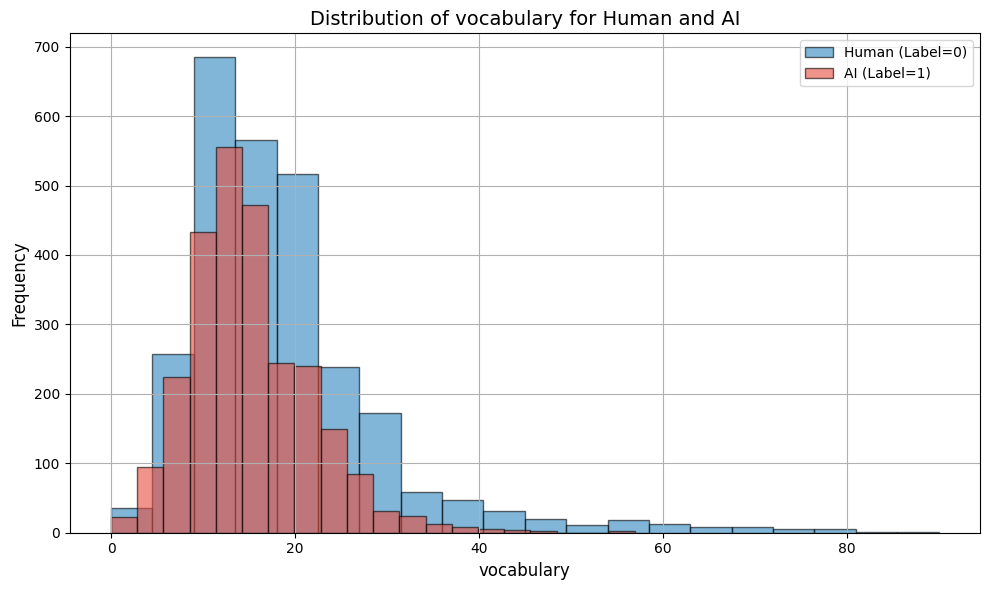

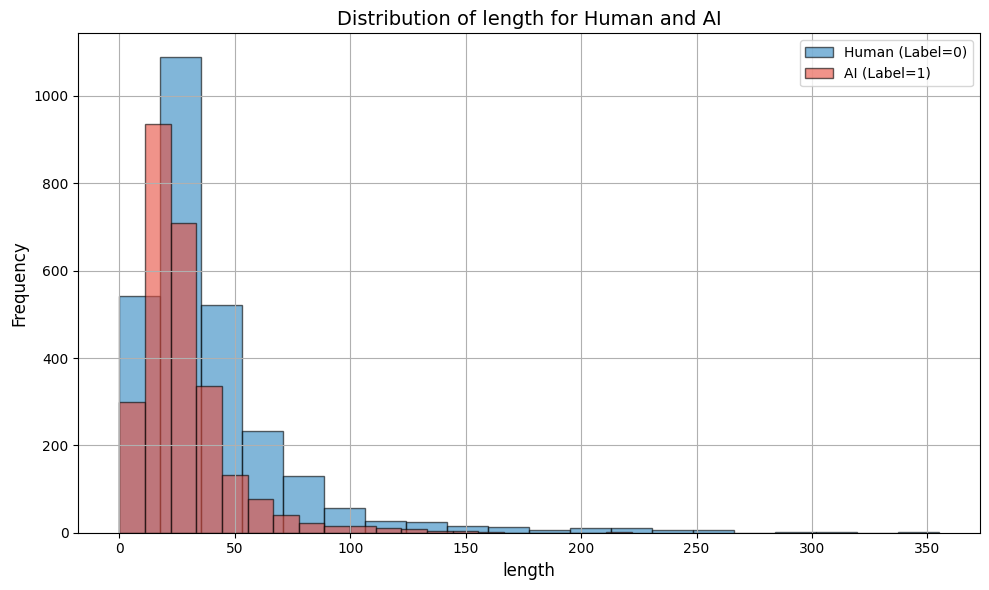

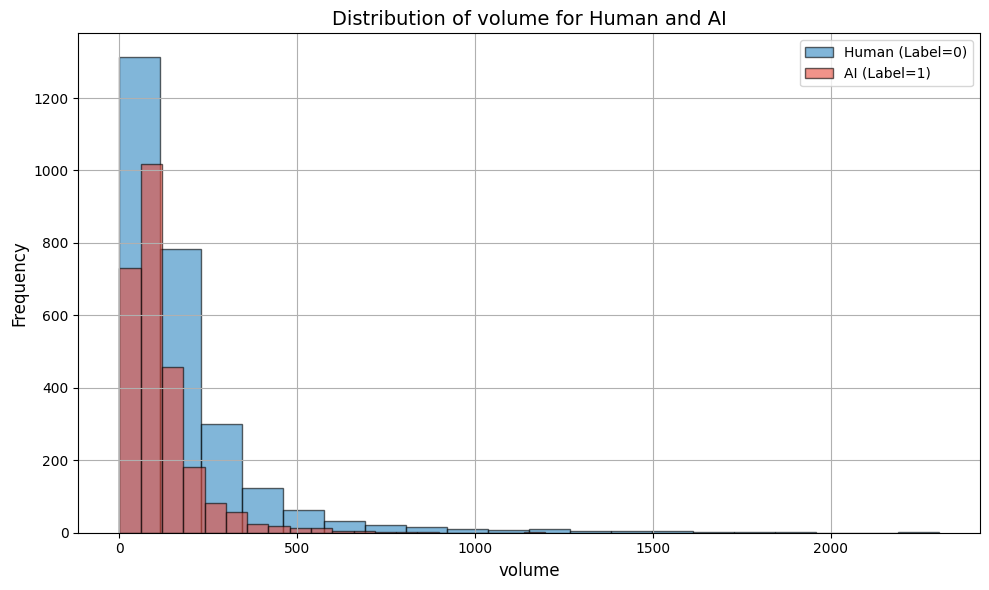

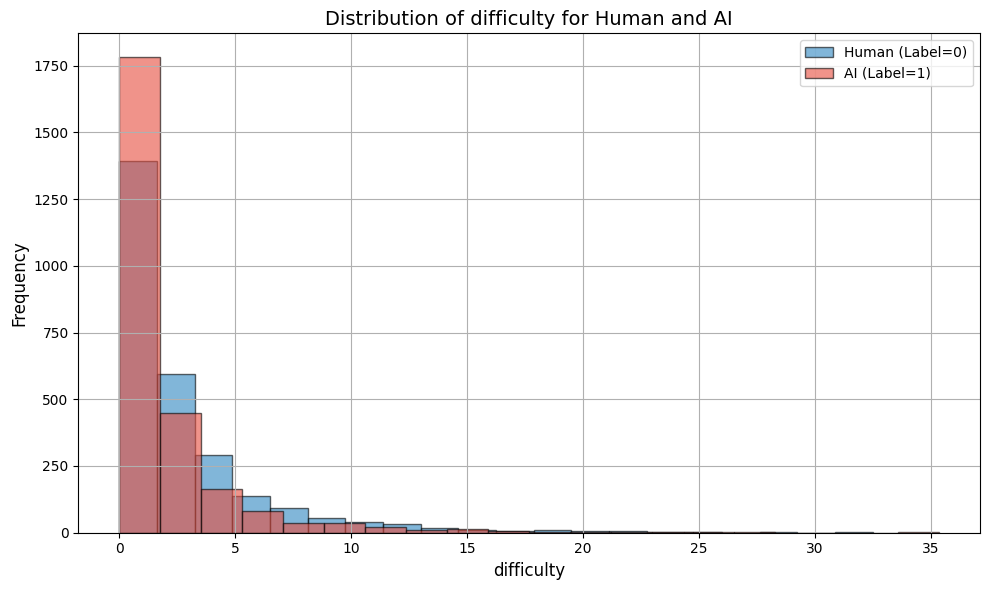

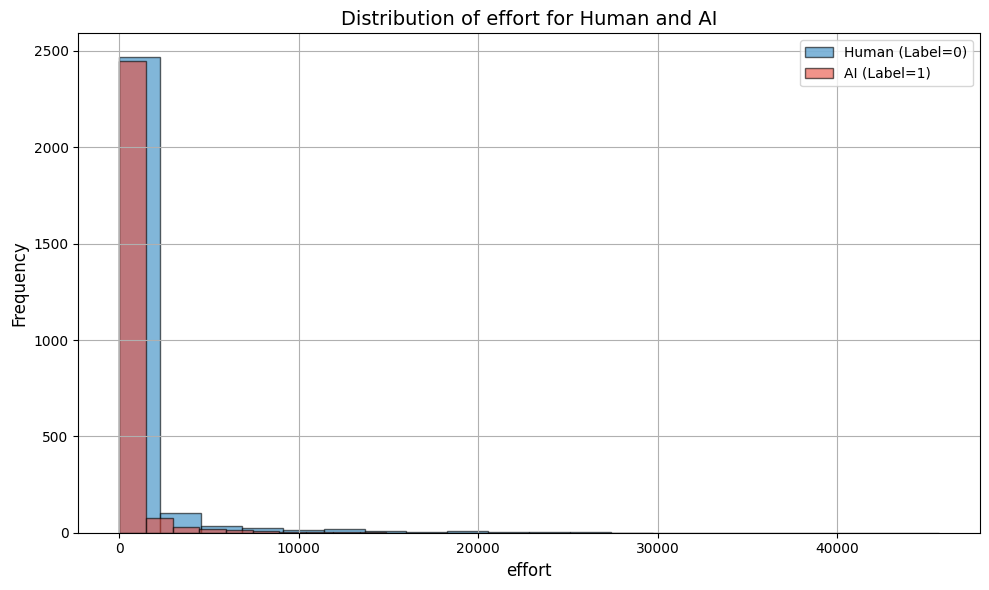

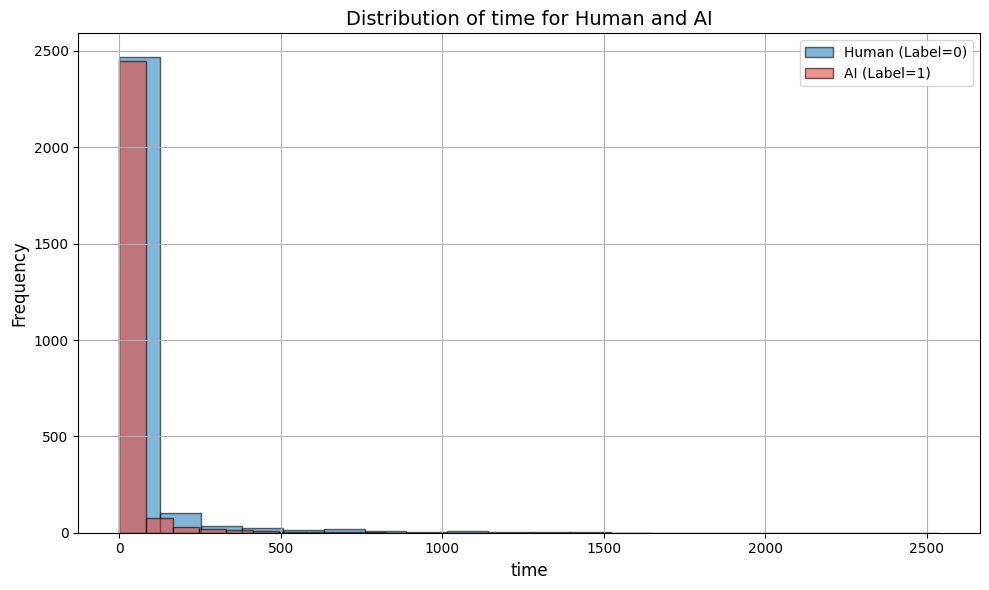

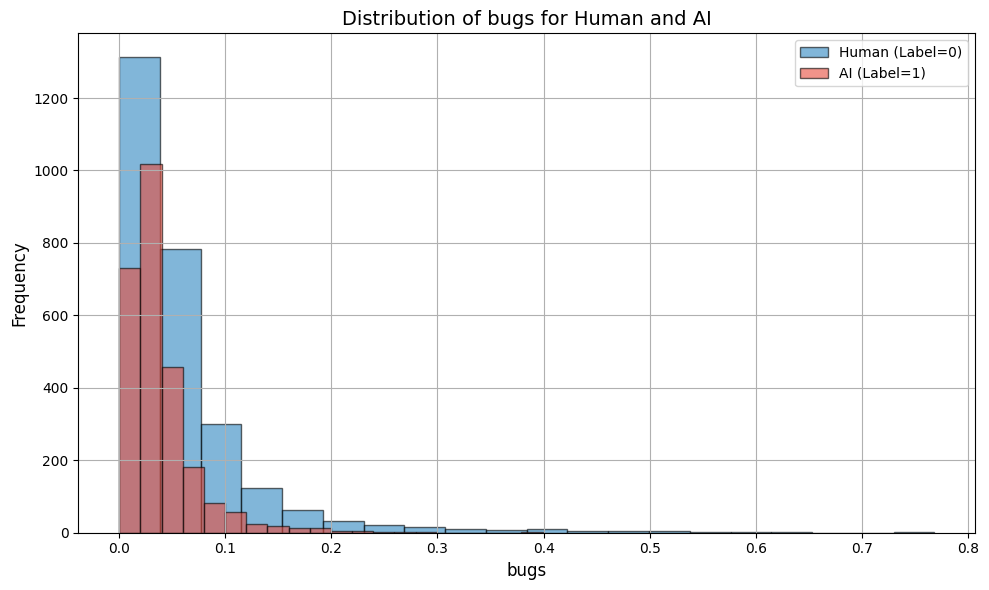

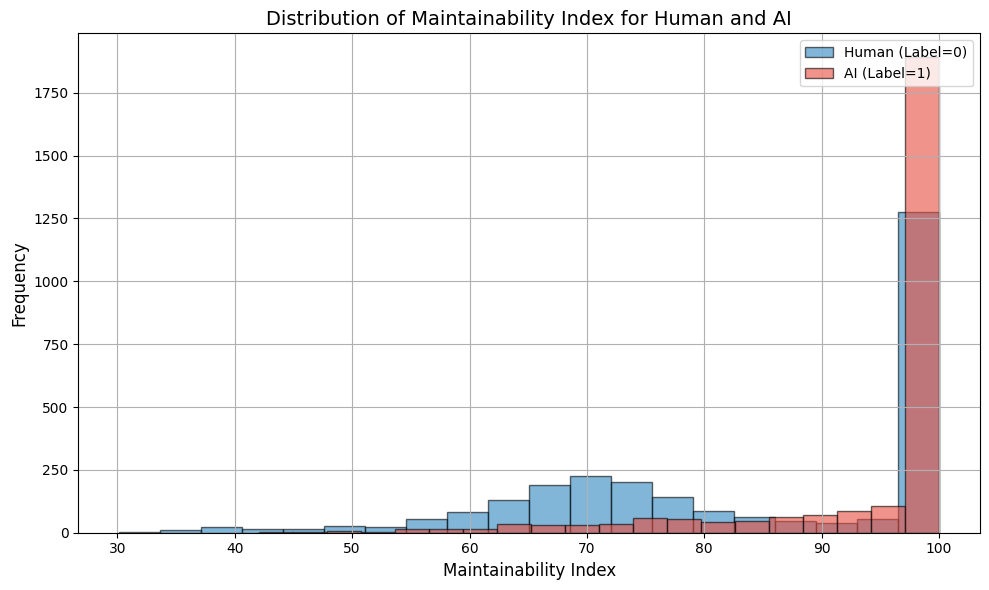

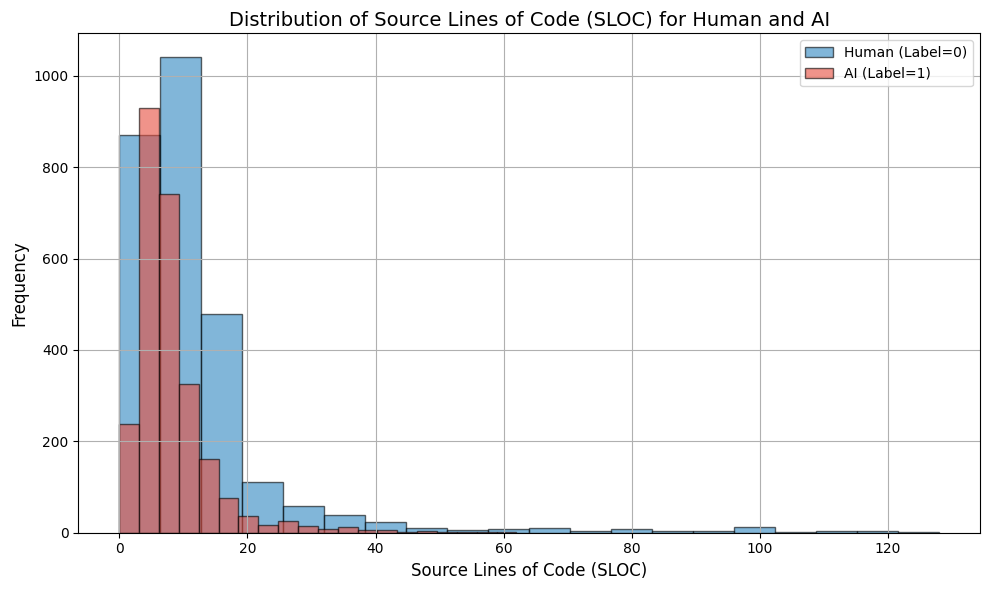

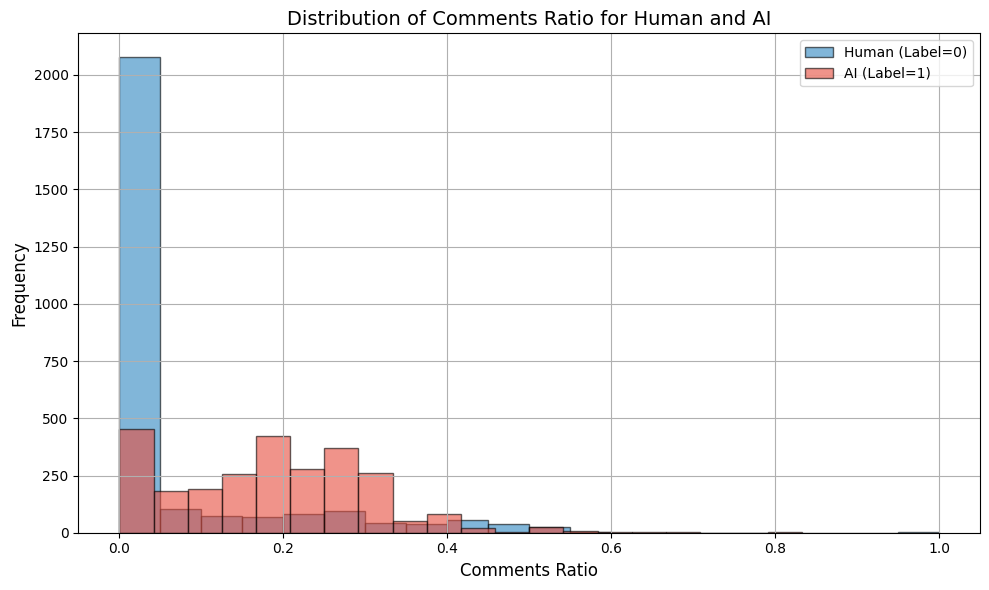

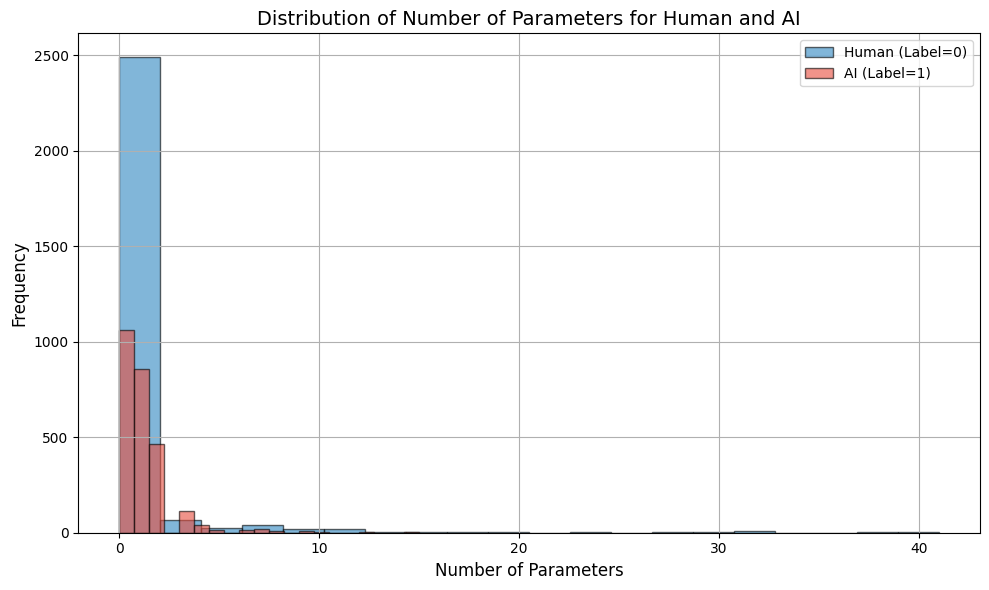

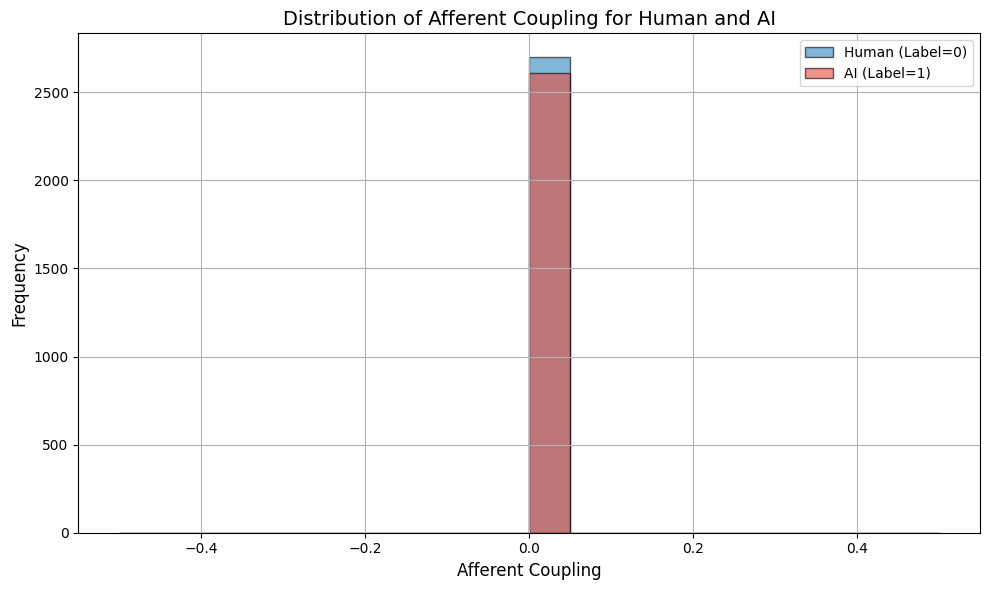

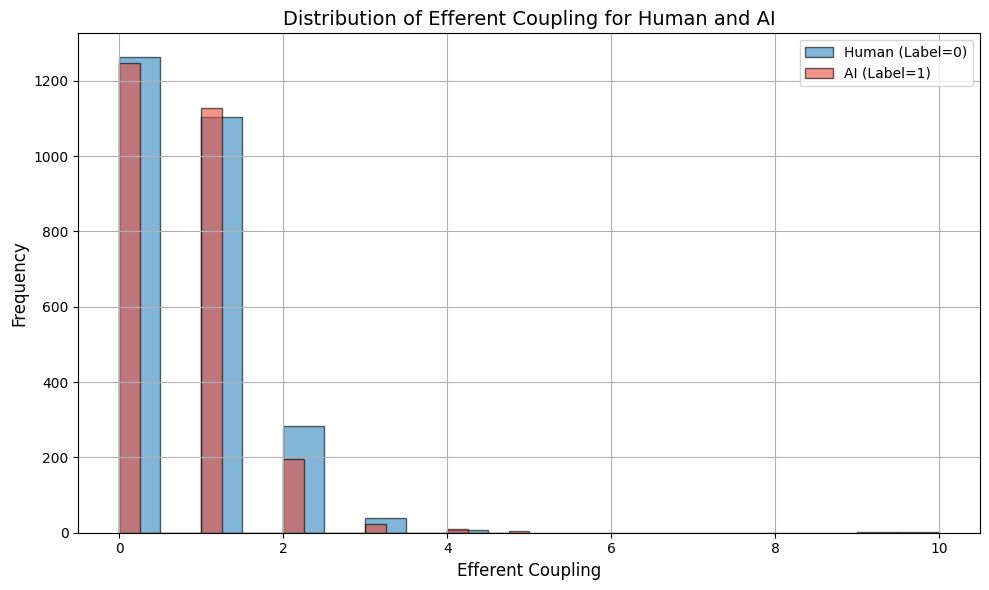

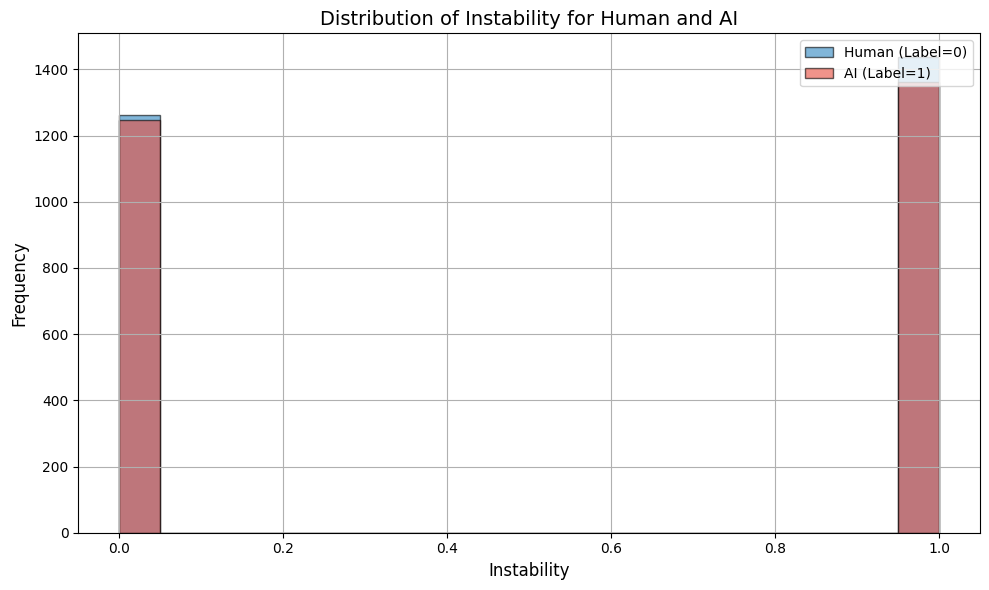

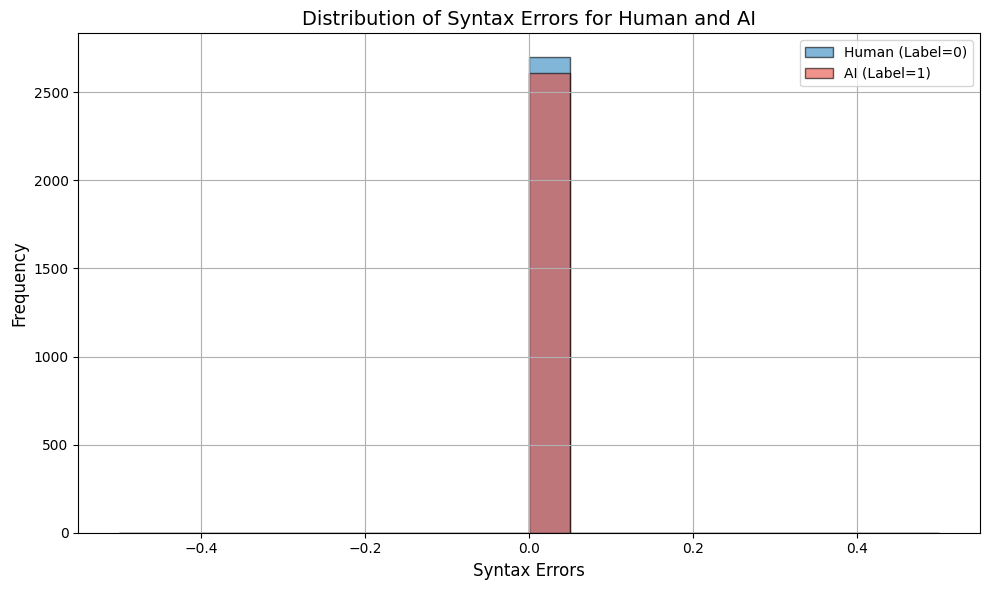

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
file_path = 'main-dataset.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Step 3: Filter the data based on Label
human_data = data[data['Label'] == 0]  # Data for human-generated code
ai_data = data[data['Label'] == 1]     # Data for AI-generated code

# Step 4: Plot the distribution for each numerical feature for human and AI labels separately
for column in data.columns:
    if data[column].dtype != 'object' and column != 'Label':  # Skip non-numerical columns and the label column
        plt.figure(figsize=(10, 6))
        
        # Plot human label data (Label = 0) using a professional color
        plt.hist(human_data[column], bins=20, alpha=0.6, label='Human (Label=0)', color='#2E86C1', edgecolor='black')
        
        # Plot AI label data (Label = 1) using a different professional color
        plt.hist(ai_data[column], bins=20, alpha=0.6, label='AI (Label=1)', color='#E74C3C', edgecolor='black')
        
        plt.title(f'Distribution of {column} for Human and AI', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
